# Characteristic of Olist

Olist is an e-commerce from Brazil. <br>
While, the customer could register freely on the website. <br>
The selling system is still in an offline process, where an Olist sales will look for a potential seller (mostly SME), and then if both parties agree, the sales will register the seller into the Olist website. <br>
Therefore, it is good for Olist to improve seller's performance to also increase Olist's sales. The recommendation is to know which features to improve to increase seller's order count on Olist.

## Objective

* To see the characteristic of sellers' and customer's on Olist. If there is any possibilities to improve sales from sellers and gain more customers.
* (Further analysis) To look for the nearest delivery spot, especially for sellers' drop-off point/inventory.

## Import Libraries

In [1]:
# loading in modules
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data
<a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce">Olist Dataset</a> consists 9 csv files.

In [2]:
# creating file path
dbfile = '/Users/Milka/Downloads/olist.db' 
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

### Dataset Schema
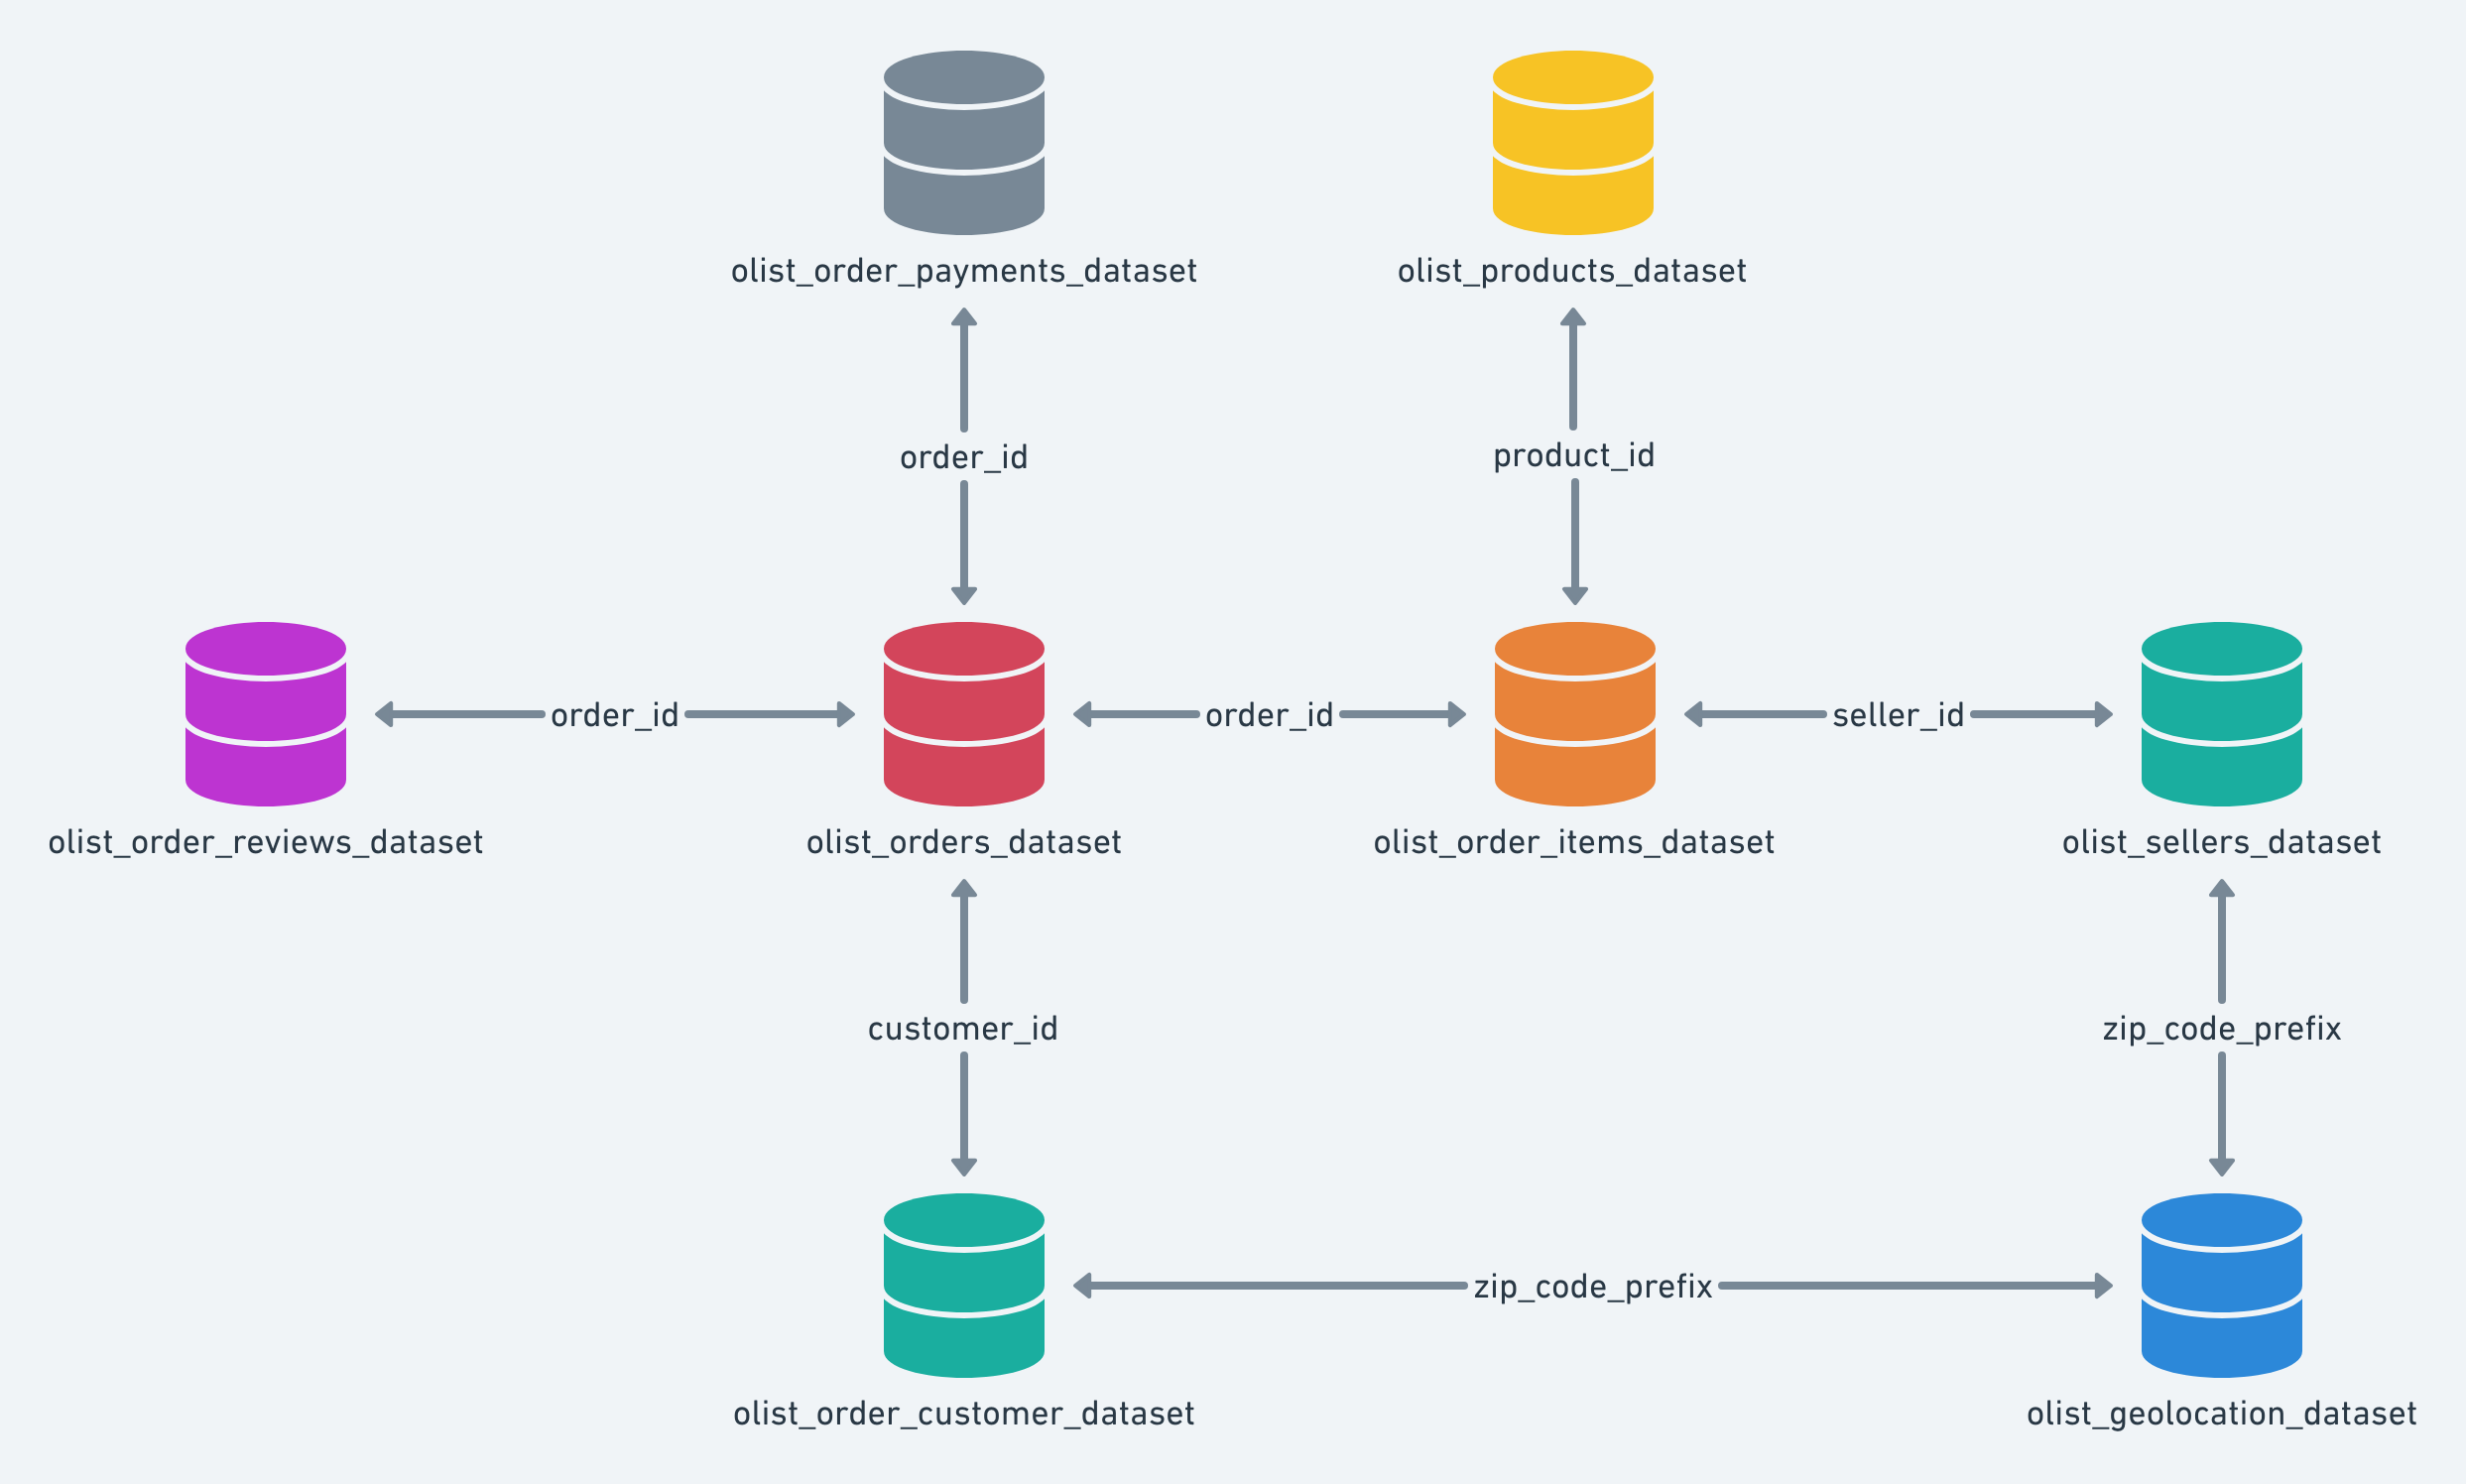

In [4]:
# creating cursor
cur = con.cursor()

In [5]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [6]:
create_connection(dbfile)

In [7]:
# reading all table names

table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


There are **9 tables** in this database.

## Joining Tables
Selecting which tables to explore more and join those tables.

### Customer Table
To see the order and how long does it take to finish it.

In [8]:
df_cust = pd.read_sql_query("SELECT order_id, oc.customer_id, order_status, customer_state, order_purchase_timestamp, \
                       order_delivered_carrier_date, order_delivered_customer_date, \
                       (strftime('%Y%m%d', order_delivered_carrier_date) - strftime('%Y%m%d', order_purchase_timestamp)) handed_to_courier_time, \
                       (strftime('%Y%m%d', order_delivered_customer_date) - strftime('%Y%m%d', order_purchase_timestamp)) delivery_time \
                       FROM olist_order_customer_dataset oc \
                       JOIN olist_order_dataset o \
                       ON o.customer_id = oc.customer_id \
                       GROUP BY order_id \
                       ", con)
df_cust.head()

,order_id,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,RJ,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,6.0,7.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,SP,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,78.0,86.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,MG,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2.0,8.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,SP,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2.0,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,SP,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,12.0,97.0


In [9]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   customer_state                 99441 non-null  object 
 4   order_purchase_timestamp       99441 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   handed_to_courier_time         97658 non-null  float64
 8   delivery_time                  96476 non-null  float64
dtypes: float64(2), object(7)
memory usage: 6.8+ MB


In [10]:
df_cust[(df_cust['handed_to_courier_time'] < 0) | (df_cust['delivery_time'] < 0)]

,order_id,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time
24840,4021cd7611d6d9ce5ffcd24817fc374f,ac27243bffbc9c58eb62adfb58c71488,delivered,SP,2018-08-18 11:49:40,2018-08-14 06:22:00,2018-08-29 04:41:53,-4.0,11.0
48241,7c48bb55e8e4f7e56d412e9653db37bc,34ef6181341eb36c47fd601c46878f00,delivered,SP,2018-07-16 18:40:53,2018-01-26 13:35:00,2018-07-23 20:04:45,-590.0,7.0


Drop rows with anomaly (where the deliver date happened before purchase date).

In [11]:
df_cust = df_cust[~((df_cust['handed_to_courier_time'] < 0) | (df_cust['delivery_time'] < 0))]
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99439 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99439 non-null  object 
 1   customer_id                    99439 non-null  object 
 2   order_status                   99439 non-null  object 
 3   customer_state                 99439 non-null  object 
 4   order_purchase_timestamp       99439 non-null  object 
 5   order_delivered_carrier_date   97656 non-null  object 
 6   order_delivered_customer_date  96474 non-null  object 
 7   handed_to_courier_time         97656 non-null  float64
 8   delivery_time                  96474 non-null  float64
dtypes: float64(2), object(7)
memory usage: 7.6+ MB


Currently there are 4 columns with some null-values in 2 columns. This will be handled when all the tables are joined.

### Product Table

In [12]:
df_product = pd.read_sql_query("SELECT product_id, product_category_name_english AS product_category \
                       FROM product_category_name_translation cat \
                       JOIN olist_products_dataset p \
                       ON p.product_category_name = cat.product_category_name \
                       ", con)
df_product.head()

,product_id,product_category
0,00210e41887c2a8ef9f791ebc780cc36,health_beauty
1,0042f1a9a7e0edd1400c6cd0fda065f8,health_beauty
2,006619bbed68b000c8ba3f8725d5409e,health_beauty
3,00878d953636afec00d3e85d55a12e7f,health_beauty
4,008b0ec3de3638637099f97add750136,health_beauty


In [13]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        32328 non-null  object
 1   product_category  32328 non-null  object
dtypes: object(2)
memory usage: 505.3+ KB


### Order Table
To see the sellers, the products that are sold, price per item, total price (payment_value), ratings that are given to the order.

In [14]:
df_order = pd.read_sql_query("SELECT oi.seller_id, orev.order_id, product_id, review_score,payment_value, price, \
                            freight_value, COUNT(product_id) total_prod, COUNT(DISTINCT orev.order_id) total_order \
                            FROM olist_order_reviews_dataset orev \
                            JOIN olist_order_payments_dataset op \
                            ON orev.order_id = op.order_id \
                            JOIN olist_order_items_dataset oi \
                            ON oi.order_id = op.order_id \
                            GROUP BY seller_id, orev.order_id \
                            ", con)
df_order.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1


In [15]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99246 entries, 0 to 99245
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_id      99246 non-null  object 
 1   order_id       99246 non-null  object 
 2   product_id     99246 non-null  object 
 3   review_score   99246 non-null  int64  
 4   payment_value  99246 non-null  float64
 5   price          99246 non-null  float64
 6   freight_value  99246 non-null  float64
 7   total_prod     99246 non-null  int64  
 8   total_order    99246 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 6.8+ MB


## Seller Table

In [16]:
df_seller = pd.read_sql_query("SELECT seller_id, seller_state \
                            FROM olist_sellers_dataset \
                            ", con)
df_seller.head()

,seller_id,seller_state
0,3442f8959a84dea7ee197c632cb2df15,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,SP


In [17]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_state  3095 non-null   object
dtypes: object(2)
memory usage: 48.5+ KB


### Merged Table
First, merge seller & order table.

In [18]:
df_merge1 = pd.merge(df_order, df_seller, on="seller_id", how="left")
df_merge1.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES


In [19]:
df_merge2 = pd.merge(df_merge1, df_cust, on="order_id", how="left")
df_merge2.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,d9442164acf4b03109425633efaa0cfc,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,23bfd4316e261786deed5a08231c75bc,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,a5ced4926d7d8fa71e9be2b007720356,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0


In [20]:
df_merge_fin = pd.merge(df_merge2, df_product, on="product_id", how="left")
df_merge_fin.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,d9442164acf4b03109425633efaa0cfc,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,23bfd4316e261786deed5a08231c75bc,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,a5ced4926d7d8fa71e9be2b007720356,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools


In [21]:
df_merge_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99246 entries, 0 to 99245
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seller_id                      99246 non-null  object 
 1   order_id                       99246 non-null  object 
 2   product_id                     99246 non-null  object 
 3   review_score                   99246 non-null  int64  
 4   payment_value                  99246 non-null  float64
 5   price                          99246 non-null  float64
 6   freight_value                  99246 non-null  float64
 7   total_prod                     99246 non-null  int64  
 8   total_order                    99246 non-null  int64  
 9   seller_state                   99246 non-null  object 
 10  customer_id                    99244 non-null  object 
 11  order_status                   99244 non-null  object 
 12  customer_state                 99244 non-null 

* The date data needs to be changed to dtime.
* There are ~2% missing values in `order_delivered_carrier_date`, `order_delivered_customer_date`, `handed_to_courier_time`, `delivery_time`, and `prodct_category` columns. <br>
* To feel the null values, first must check whether the status is <i>delivered</i> or not, if it is <i>delivered</i>, then it would be filled with mean values from the columns.

In [22]:
## change dtype

df_merge_fin[['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date']] =  \
df_merge_fin[['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date']].apply(pd.to_datetime)

In [23]:
df_merge_fin.dtypes

seller_id                                object
order_id                                 object
product_id                               object
review_score                              int64
payment_value                           float64
price                                   float64
freight_value                           float64
total_prod                                int64
total_order                               int64
seller_state                             object
customer_id                              object
order_status                             object
customer_state                           object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
handed_to_courier_time                  float64
delivery_time                           float64
product_category                         object
dtype: object

In [24]:
## total of null-values

df_merge_fin.isnull().sum()

seller_id                           0
order_id                            0
product_id                          0
review_score                        0
payment_value                       0
price                               0
freight_value                       0
total_prod                          0
total_order                         0
seller_state                        0
customer_id                         2
order_status                        2
customer_state                      2
order_purchase_timestamp            2
order_delivered_carrier_date      994
order_delivered_customer_date    2092
handed_to_courier_time            994
delivery_time                    2092
product_category                 1445
dtype: int64

In [25]:
df_merge_fin.duplicated().sum()

0

In [26]:
## check unique values in 'product_category'

df_merge_fin['product_category'].value_counts()

bed_bath_table               9477
health_beauty                8790
sports_leisure               7715
computers_accessories        6713
furniture_decor              6465
                             ... 
arts_and_craftmanship          23
la_cuisine                     12
cds_dvds_musicals              12
fashion_childrens_clothes       8
security_and_services           2
Name: product_category, Length: 71, dtype: int64

## Null-values

### By order status

In [27]:
## create a new dataframe for null-values 

check_null = df_merge_fin[(df_merge_fin['handed_to_courier_time'].isnull()) | (df_merge_fin['delivery_time'].isnull())]
check_null['order_status'].value_counts()

shipped        1033
canceled        438
invoiced        307
processing      295
delivered         9
unavailable       7
approved          2
Name: order_status, dtype: int64

In [28]:
# dataframe for null-values in 'delivered' status, null values replaced with the mean of 'delivery_time'

check_null_1 = check_null[check_null['order_status'] == 'delivered']
check_null_1['delivery_time'].fillna(df_merge_fin['delivery_time'].mean(), inplace=True)
check_null_1['handed_to_courier_time'].fillna(df_merge_fin['handed_to_courier_time'].mean(), inplace=True)
check_null_1.isnull().sum()

C:\Users\Milka\AppData\Local\Temp\ipykernel_13680\784888895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_1['delivery_time'].fillna(df_merge_fin['delivery_time'].mean(), inplace=True)
C:\Users\Milka\AppData\Local\Temp\ipykernel_13680\784888895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_1['handed_to_courier_time'].fillna(df_merge_fin['handed_to_courier_time'].mean(), inplace=True)


seller_id                        0
order_id                         0
product_id                       0
review_score                     0
payment_value                    0
price                            0
freight_value                    0
total_prod                       0
total_order                      0
seller_state                     0
customer_id                      0
order_status                     0
customer_state                   0
order_purchase_timestamp         0
order_delivered_carrier_date     2
order_delivered_customer_date    8
handed_to_courier_time           0
delivery_time                    0
product_category                 0
dtype: int64

In [29]:
# dataframe for null-values in 'shipped' status filled with the column before it

check_null_2 = check_null[check_null['order_status'] == 'shipped']
check_null_2['delivery_time'].fillna(check_null_2['handed_to_courier_time'], inplace=True)
check_null_2.isnull().sum()

C:\Users\Milka\AppData\Local\Temp\ipykernel_13680\1683995574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_2['delivery_time'].fillna(check_null_2['handed_to_courier_time'], inplace=True)


seller_id                           0
order_id                            0
product_id                          0
review_score                        0
payment_value                       0
price                               0
freight_value                       0
total_prod                          0
total_order                         0
seller_state                        0
customer_id                         0
order_status                        0
customer_state                      0
order_purchase_timestamp            0
order_delivered_carrier_date        0
order_delivered_customer_date    1033
handed_to_courier_time              0
delivery_time                       0
product_category                   23
dtype: int64

In [30]:
# 'order_delivered_customer_date' column filled with the column before it

check_null_2['order_delivered_customer_date'].fillna(check_null_2['order_delivered_carrier_date'], inplace=True)
check_null_2.isnull().sum()

C:\Users\Milka\AppData\Local\Temp\ipykernel_13680\3554227885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_2['order_delivered_customer_date'].fillna(check_null_2['order_delivered_carrier_date'], inplace=True)


seller_id                         0
order_id                          0
product_id                        0
review_score                      0
payment_value                     0
price                             0
freight_value                     0
total_prod                        0
total_order                       0
seller_state                      0
customer_id                       0
order_status                      0
customer_state                    0
order_purchase_timestamp          0
order_delivered_carrier_date      0
order_delivered_customer_date     0
handed_to_courier_time            0
delivery_time                     0
product_category                 23
dtype: int64

In [31]:
# dataframe for null-values in other than 'delivered' & 'shipped' status, filled with 0

check_null_3 = check_null[~((check_null['order_status'] == 'delivered') | (check_null['order_status'] == 'shipped'))]
check_null_3.fillna(0, inplace=True)
check_null_3.isnull().sum()

C:\Users\Milka\AppData\Local\Temp\ipykernel_13680\2374088403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_3.fillna(0, inplace=True)


seller_id                        0
order_id                         0
product_id                       0
review_score                     0
payment_value                    0
price                            0
freight_value                    0
total_prod                       0
total_order                      0
seller_state                     0
customer_id                      0
order_status                     0
customer_state                   0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
handed_to_courier_time           0
delivery_time                    0
product_category                 0
dtype: int64

In [32]:
# combine all three dataframes into 1 dataframe by using append

seller_cust_conc = pd.concat([check_null_1, check_null_2], ignore_index=True)
seller_cust_fin = pd.concat([seller_cust_conc, check_null_3], ignore_index=True)

In [33]:
## fill null-values for `product_category` with the mode value

seller_cust_fin['product_category'].fillna('bed_bath_table', inplace=True)
seller_cust_fin.isnull().sum()

seller_id                        0
order_id                         0
product_id                       0
review_score                     0
payment_value                    0
price                            0
freight_value                    0
total_prod                       0
total_order                      0
seller_state                     0
customer_id                      0
order_status                     0
customer_state                   0
order_purchase_timestamp         0
order_delivered_carrier_date     2
order_delivered_customer_date    8
handed_to_courier_time           0
delivery_time                    0
product_category                 0
dtype: int64

In [34]:
# fill the date with the column before it

seller_cust_fin['order_delivered_customer_date'].fillna(seller_cust_fin['order_purchase_timestamp'], inplace=True)
seller_cust_fin['order_delivered_carrier_date'].fillna(seller_cust_fin['order_purchase_timestamp'], inplace=True)

In [35]:
seller_cust_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seller_id                      2093 non-null   object 
 1   order_id                       2093 non-null   object 
 2   product_id                     2093 non-null   object 
 3   review_score                   2093 non-null   int64  
 4   payment_value                  2093 non-null   float64
 5   price                          2093 non-null   float64
 6   freight_value                  2093 non-null   float64
 7   total_prod                     2093 non-null   int64  
 8   total_order                    2093 non-null   int64  
 9   seller_state                   2093 non-null   object 
 10  customer_id                    2093 non-null   object 
 11  order_status                   2093 non-null   object 
 12  customer_state                 2093 non-null   o

In [36]:
seller_cust_fin.duplicated().sum()

0

### Merge all rows

In [37]:
## prepare a copy of original dataframe to be the base

df_eda = df_merge_fin.copy()
df_eda.isnull().sum()

seller_id                           0
order_id                            0
product_id                          0
review_score                        0
payment_value                       0
price                               0
freight_value                       0
total_prod                          0
total_order                         0
seller_state                        0
customer_id                         2
order_status                        2
customer_state                      2
order_purchase_timestamp            2
order_delivered_carrier_date      994
order_delivered_customer_date    2092
handed_to_courier_time            994
delivery_time                    2092
product_category                 1445
dtype: int64

In [38]:
df_eda.dropna(inplace=True)
df_eda.isnull().sum()

seller_id                        0
order_id                         0
product_id                       0
review_score                     0
payment_value                    0
price                            0
freight_value                    0
total_prod                       0
total_order                      0
seller_state                     0
customer_id                      0
order_status                     0
customer_state                   0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
handed_to_courier_time           0
delivery_time                    0
product_category                 0
dtype: int64

In [39]:
# concat the appended dataframe into the base dataframe

df_eda_fin = pd.concat([df_eda, seller_cust_fin], ignore_index=True)
df_eda_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97860 entries, 0 to 97859
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seller_id                      97860 non-null  object 
 1   order_id                       97860 non-null  object 
 2   product_id                     97860 non-null  object 
 3   review_score                   97860 non-null  int64  
 4   payment_value                  97860 non-null  float64
 5   price                          97860 non-null  float64
 6   freight_value                  97860 non-null  float64
 7   total_prod                     97860 non-null  int64  
 8   total_order                    97860 non-null  int64  
 9   seller_state                   97860 non-null  object 
 10  customer_id                    97860 non-null  object 
 11  order_status                   97860 non-null  object 
 12  customer_state                 97860 non-null 

The datetime columns need to be changed.

In [40]:
## change dtype

df_eda_fin[['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date']] =  \
df_eda_fin[['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date']].apply(pd.to_datetime, errors='coerce')

In [41]:
df_eda_fin.dtypes

seller_id                                object
order_id                                 object
product_id                               object
review_score                              int64
payment_value                           float64
price                                   float64
freight_value                           float64
total_prod                                int64
total_order                               int64
seller_state                             object
customer_id                              object
order_status                             object
customer_state                           object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
handed_to_courier_time                  float64
delivery_time                           float64
product_category                         object
dtype: object

The final dataframe consists of 97860 rows. <br>
There is no null values.

## Duplicated Values

In [42]:
df_eda_fin.duplicated().sum()

0

## Statistic Descriptive

### Numerical

In [43]:
df_num = df_eda_fin.select_dtypes(include='number')
df_num.describe()

,review_score,payment_value,price,freight_value,total_prod,total_order,handed_to_courier_time,delivery_time
count,97860.000000,97860.000000,97860.000000,97860.000000,97860.000000,97860.0,97860.000000,97860.000000
mean,4.089086,158.197129,125.357000,20.205817,1.182138,1.0,62.474709,256.763363
std,1.343457,216.958079,188.747788,15.930426,0.705690,0.0,684.929118,1378.346095
min,1.000000,0.000000,0.850000,0.000000,1.000000,1.0,0.000000,0.000000
25%,4.000000,59.517500,41.550000,13.250000,1.000000,1.0,1.000000,7.000000
50%,5.000000,103.470000,79.000000,16.390000,1.000000,1.0,2.000000,12.000000
75%,5.000000,176.650000,139.900000,21.300000,1.000000,1.0,4.000000,82.000000
max,5.000000,13664.080000,6735.000000,409.680000,42.000000,1.0,9187.000000,9392.000000


* Probably, other than `total_order`, all columns are skewed to the right. Those columns are: `payment_value`, `price`, `freight_value`, `total_prod`, `handed_to_courier_time`, and `delivery_time` have a high max value and it is far from the mean value.
* While `review_score` is more skewed to the left, with values from Q2-max are all 5.
* Most of the `total_order` is 1.
* `payment_value` has a minimum value 0, it means that there are some order that are not yet paid.
* `freight_value` could be 0.

Text(0.5, 1.0, 'delivery_time')

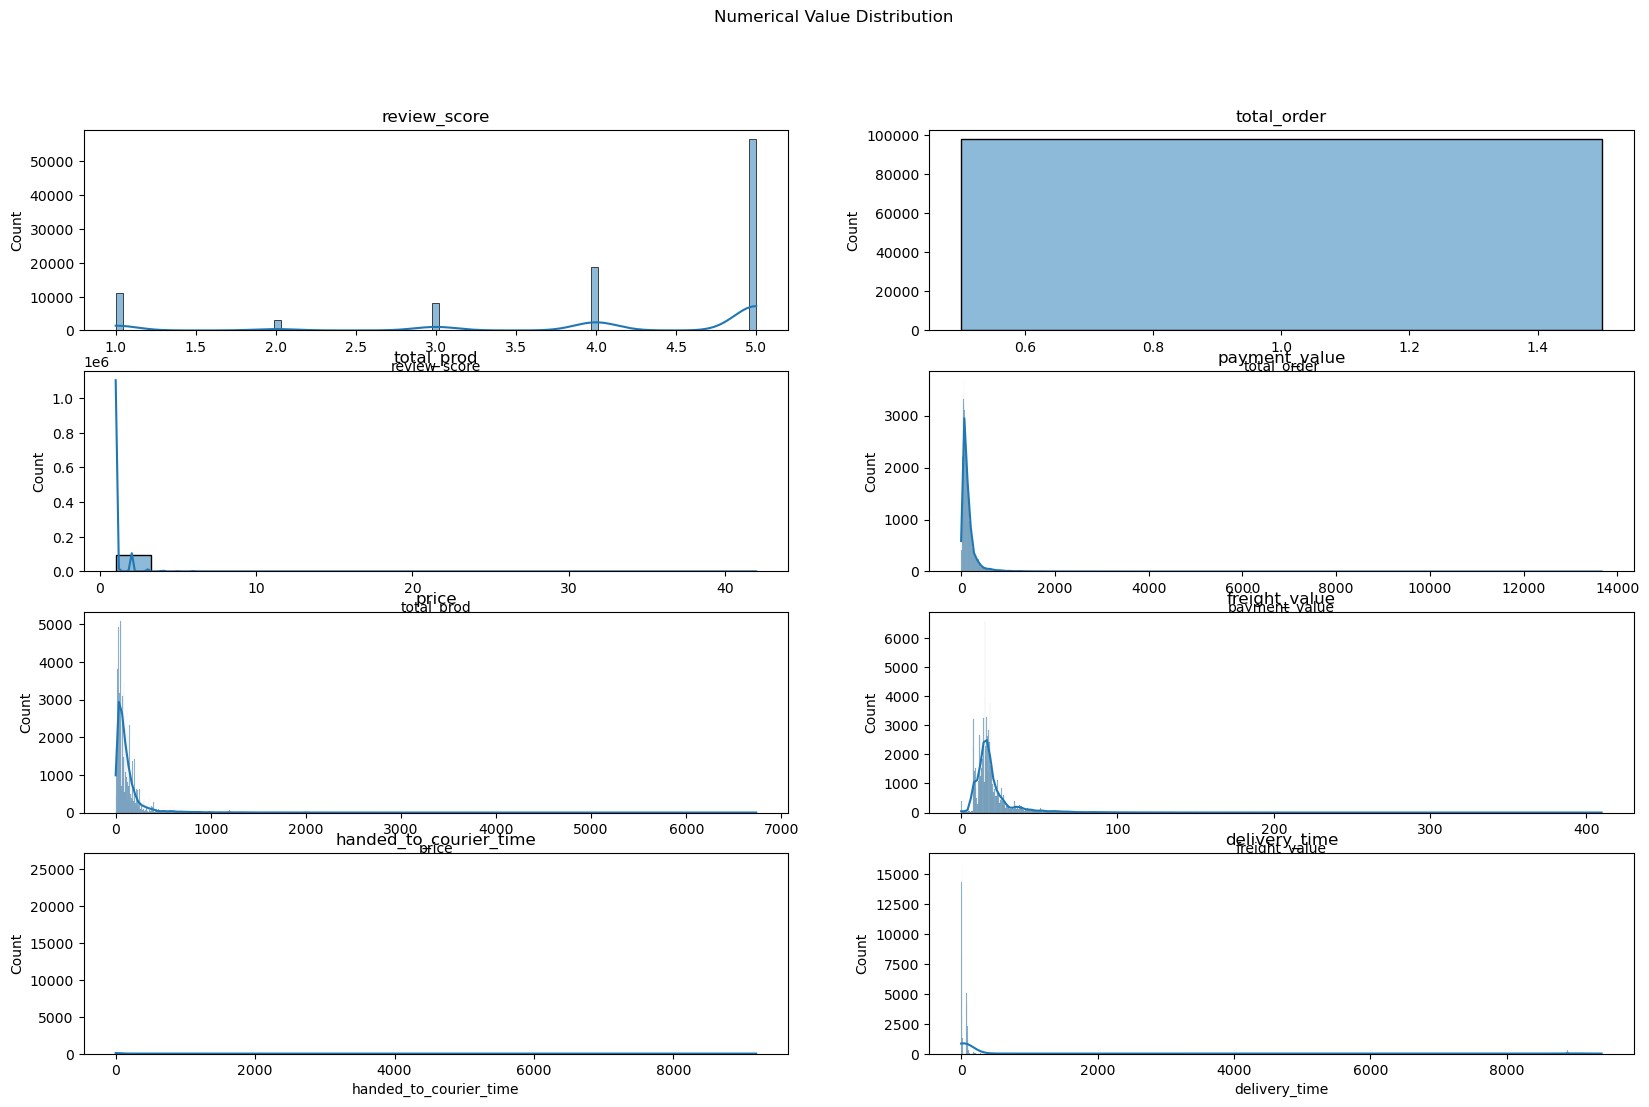

In [44]:
fig, axes = plt.subplots(4, 2, figsize=(20, 12), sharey=False)
fig.suptitle('Numerical Value Distribution')

# review_score
sns.histplot(ax=axes[0][0], data=df_eda_fin, x='review_score', kde=True)
axes[0][0].set_title('review_score')

# total_order
sns.histplot(ax=axes[0][1], data=df_eda_fin, x='total_order', kde=True)
axes[0][1].set_title('total_order')

# total_prod
sns.histplot(ax=axes[1][0], data=df_eda_fin, x='total_prod', kde=True)
axes[1][0].set_title('total_prod')

# payment_value
sns.histplot(ax=axes[1][1], data=df_eda_fin, x='payment_value', kde=True)
axes[1][1].set_title('payment_value')

# price
sns.histplot(ax=axes[2][0], data=df_eda_fin, x='price', kde=True)
axes[2][0].set_title('price')

# freight_value
sns.histplot(ax=axes[2][1], data=df_eda_fin, x='freight_value', kde=True)
axes[2][1].set_title('freight_value')

# handed_to_courier_time
sns.histplot(ax=axes[3][0], data=df_eda_fin, x='handed_to_courier_time', kde=True)
axes[3][0].set_title('handed_to_courier_time')

# delivery_time
sns.histplot(ax=axes[3][1], data=df_eda_fin, x='delivery_time', kde=True)
axes[3][1].set_title('delivery_time')

### Normalize Values
* To change the shape distribution into normal distribution. <br>
* The range is between 0-1.

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = MinMaxScaler()
seller_cust_final[['review_score', 'payment_value', 'price', 'freight_value', 'total_prod', 'handed_to_courier_time', 'delivery_time']] = scaler.fit_transform(seller_cust_final[['review_score', 'payment_value', 'price', 'freight_value', 'total_prod', 'handed_to_courier_time', 'delivery_time']])

NameError: name 'seller_cust_final' is not defined

In [ ]:
seller_cust_final.describe()

### Categorical

In [ ]:
df_cat = df_eda_fin.select_dtypes(exclude='number')
df_cat.describe()

* The data recorded from Sept 2016 until Sept 2018.
* There are 3,042 sellers from 23 states, with the top seller has got 1,838 orders.
* The sellers already served customers from 28 states.
* Total order is 96,561 with the highest total items in 1 order is 429.
* While there are 31,502 products purchased, the best-selling product_category is bed_bath_table with 9500 orders.
* 95.770/97.860 (~97.8%) order has been delivered.

## Outliers

In [ ]:
df_num_normal = df_eda_fin.select_dtypes(include='number')

In [ ]:
# checking outliers from the columns
plt.figure(figsize=(10,6))

# plotting
features = list(df_num)
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_num[features[i]], color='#e63946')
    plt.tight_layout()

Outliers are to be kept for natural variation of data.

## EDA

### Feature engineering

In [47]:
df_eda_fin['year'] = pd.DatetimeIndex(df_eda_fin['order_purchase_timestamp']).year
df_eda_fin['month'] = pd.DatetimeIndex(df_eda_fin['order_purchase_timestamp']).month
df_eda_fin.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,...,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,...,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances,2017.0,10.0
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances,2017.0,10.0
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances,2017.0,9.0
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,...,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools,2017.0,5.0
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,...,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools,2017.0,6.0


In [48]:
df_eda_fin['month'].value_counts()

8.0     10769
5.0     10469
7.0     10231
3.0      9671
6.0      9391
4.0      9269
2.0      8268
1.0      7868
11.0     7377
12.0     5502
10.0     4847
9.0      4196
Name: month, dtype: int64

In [49]:
df_eda_fin['month'].isnull().sum()

2

In [50]:
df_eda_fin['year'].value_counts()

2018.0    53625
2017.0    43925
2016.0      308
Name: year, dtype: int64

In [51]:
df_eda_fin = df_eda_fin[df_eda_fin['year'] != 1970]

In [52]:
df_eda_fin['year'].fillna(2018, inplace=True)
df_eda_fin['month'].fillna(8, inplace=True)

In [53]:
df_eda_fin['year'] = df_eda_fin['year'].astype(int)
df_eda_fin['month'] = df_eda_fin['month'].astype(int)

In [54]:
df_eda_fin.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,...,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,...,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances,2017,10
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances,2017,10
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances,2017,9
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,...,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools,2017,5
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,...,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools,2017,6


### Which state has the most buyer?

Text(0, 0.5, 'State')

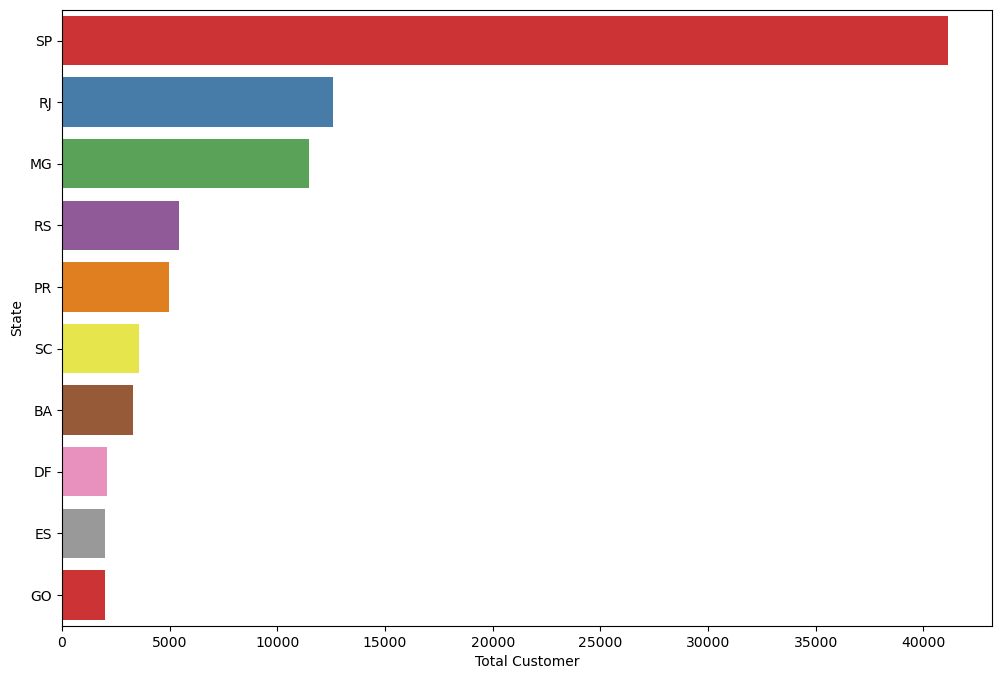

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_eda_fin['customer_state'], palette='Set1', order=df_eda_fin['customer_state'].value_counts().iloc[:10].index)
plt.xlabel('Total Customer')
plt.ylabel('State')

The state 'SP' has the highest total customer, more than twice of state 'RJ' on the second place. <br>
**What are best-seller products in state 'SP'?**

In [56]:
## new dataframe for state 'SP'

df_SP = df_eda_fin[df_eda_fin['customer_state'] == 'SP']
df_non_SP = df_eda_fin[df_eda_fin['customer_state'] != 'SP']

Text(0, 0.5, 'Product Category')

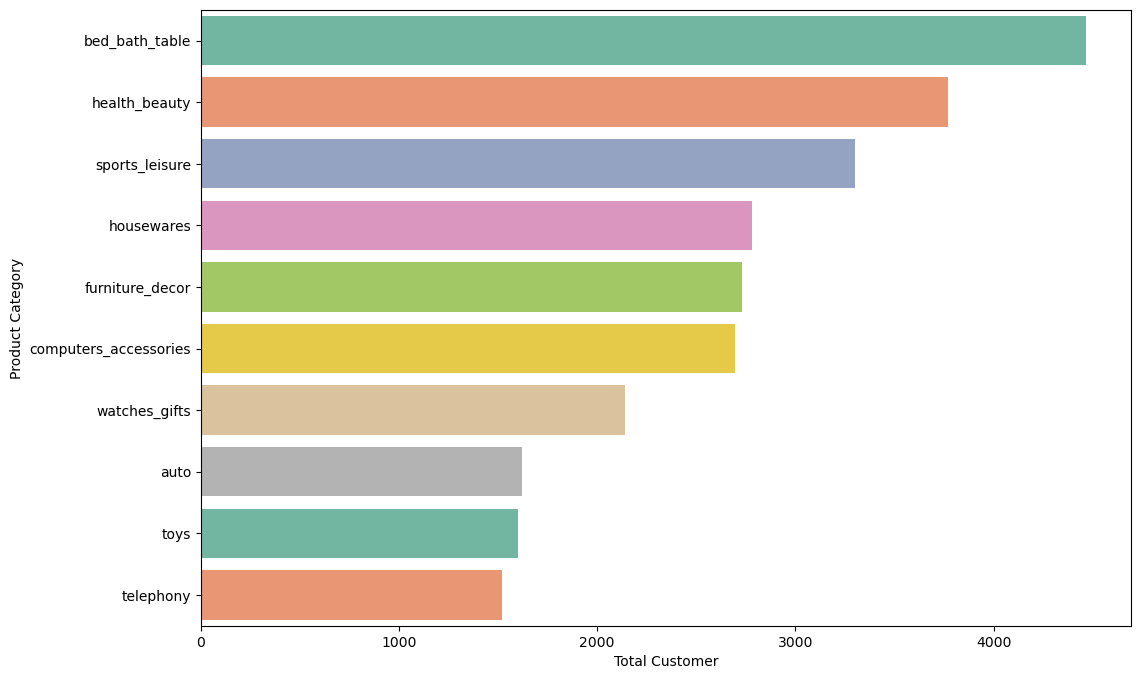

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_SP['product_category'], palette='Set2', order=df_SP['product_category'].value_counts().iloc[:10].index)
plt.xlabel('Total Customer')
plt.ylabel('Product Category')

Text(0, 0.5, 'Product Category')

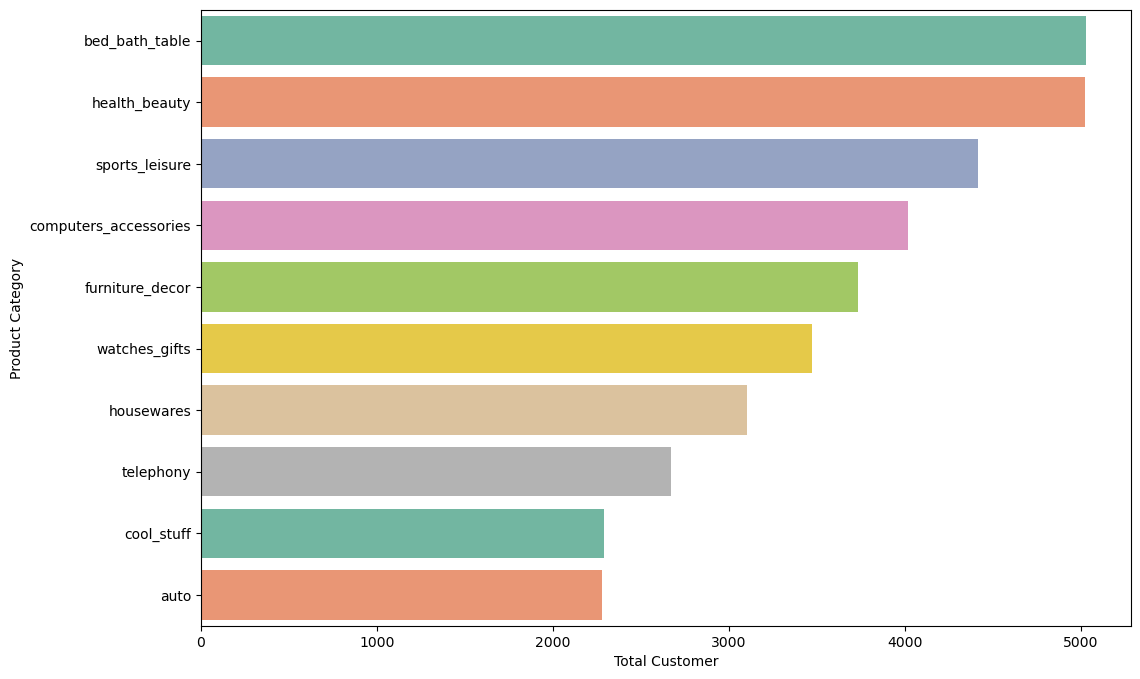

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_non_SP['product_category'], palette='Set2', order=df_non_SP['product_category'].value_counts().iloc[:10].index)
plt.xlabel('Total Customer')
plt.ylabel('Product Category')

### What is the top product?

Text(0, 0.5, 'Product Category')

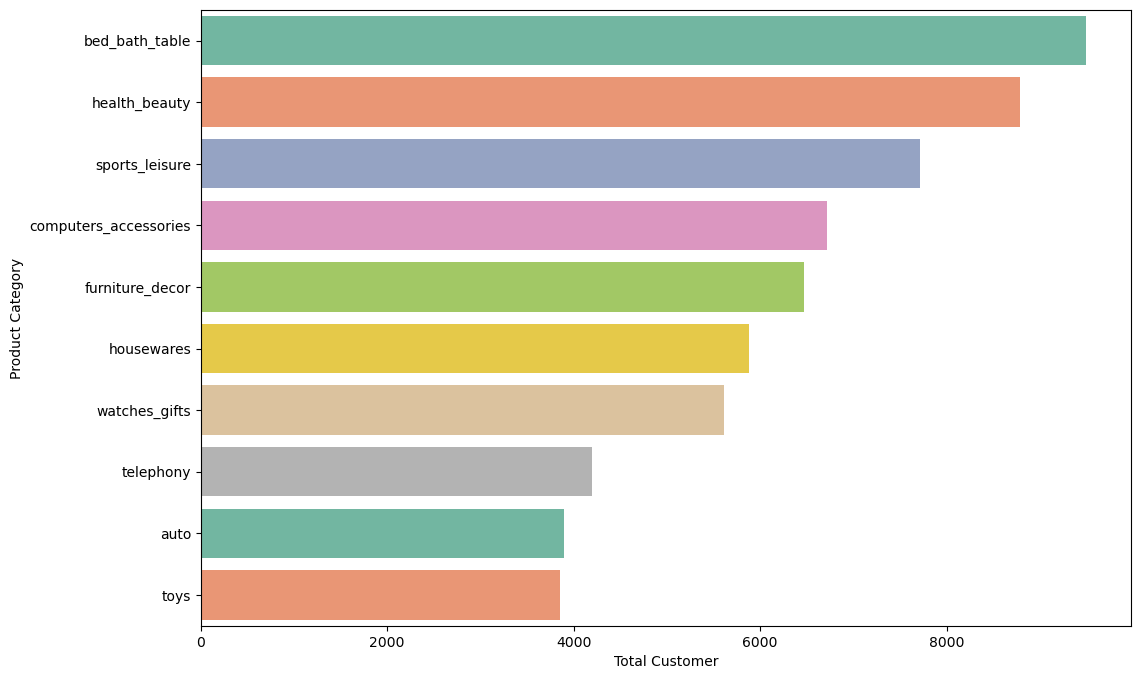

In [59]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_eda_fin['product_category'], palette='Set2', order=df_eda_fin['product_category'].value_counts().iloc[:10].index)
plt.xlabel('Total Customer')
plt.ylabel('Product Category')

Text(0, 0.5, 'Rating')

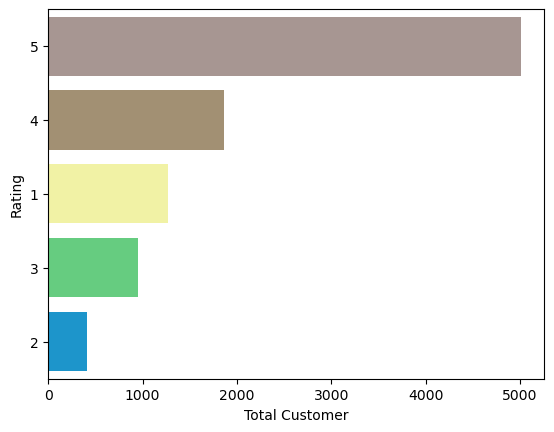

In [60]:
# ratings for best product

df_bbb = df_eda_fin[df_eda_fin['product_category'] == 'bed_bath_table']
sns.countplot(y=df_bbb['review_score'], palette='terrain_r', order=df_bbb['review_score'].value_counts().index)
plt.xlabel('Total Customer')
plt.ylabel('Rating') 

In [61]:
df_bbb.shape

(9500, 21)

Text(0, 0.5, 'Price')

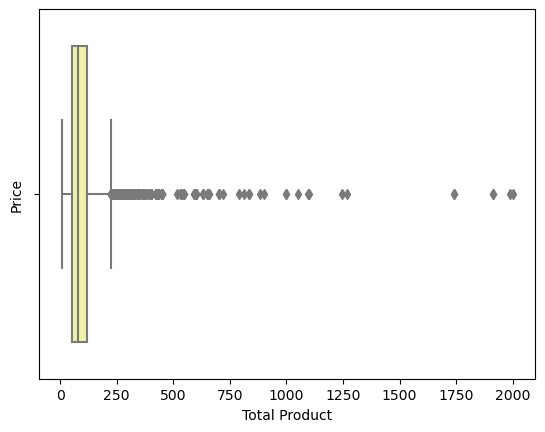

In [62]:
sns.boxplot(x=df_bbb['price'], palette='terrain_r')
plt.xlabel('Total Product')
plt.ylabel('Price') 

Text(0, 0.5, 'Seller')

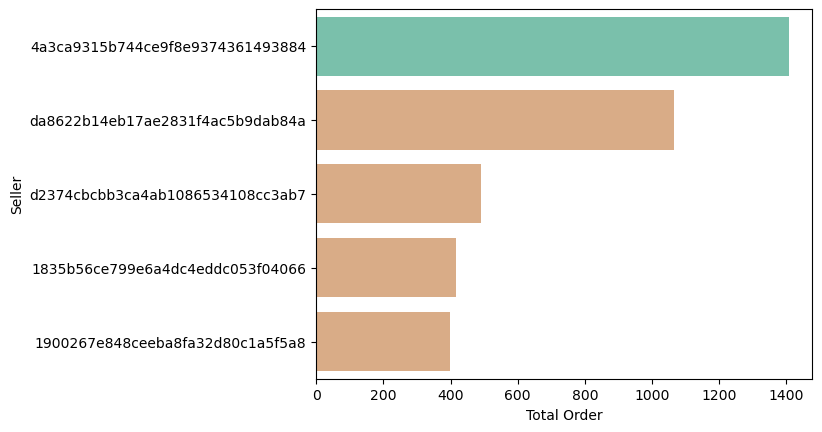

In [63]:
sns.countplot(y=df_bbb['seller_id'], palette=['#6ECCAF','#E7AB79', '#E7AB79', '#E7AB79', '#E7AB79'], order=df_bbb['seller_id'].value_counts().iloc[:5].index)
plt.xlabel('Total Order')
plt.ylabel('Seller')

#### Top Product By Year

In [64]:
df_prod_year = df_eda_fin.groupby(['year', 'product_category'])['total_order'].count().sort_values(ascending=False).reset_index()
df_prod_2018 = df_prod_year[df_prod_year['year'] == 2018].iloc[:5].reset_index()
df_prod_2017 = df_prod_year[df_prod_year['year'] == 2017].iloc[:5].reset_index()
df_prod_2016 = df_prod_year[df_prod_year['year'] == 2016].iloc[:5].reset_index()

In [65]:
df_prod_comb = pd.concat([df_prod_2018, df_prod_2017], ignore_index=True)
df_prod_all = pd.concat([df_prod_comb, df_prod_2016], ignore_index=True)
df_prod_all

,index,year,product_category,total_order
0,0,2018,health_beauty,5382
1,1,2018,bed_bath_table,4998
2,3,2018,computers_accessories,4082
3,4,2018,sports_leisure,4063
4,6,2018,watches_gifts,3485
5,2,2017,bed_bath_table,4497
6,5,2017,sports_leisure,3633
7,8,2017,health_beauty,3367
8,10,2017,furniture_decor,3192
9,11,2017,computers_accessories,2613


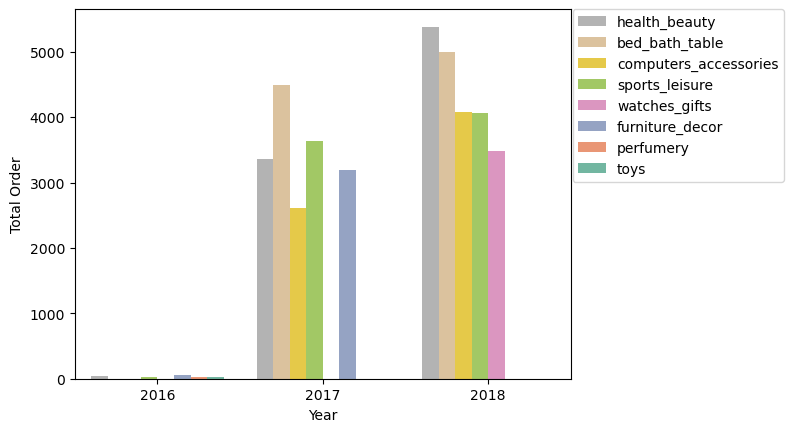

In [66]:
sns.barplot(data=df_prod_all, x='year', y='total_order', palette='Set2_r', hue='product_category')
plt.xlabel('Year')
plt.ylabel('Total Order')
plt.legend(bbox_to_anchor=(1.43, 1), loc='upper right', borderaxespad=0)

### Order & Payment per year

In [67]:
from datetime import datetime
d = datetime.now()

df_eda_fin['date'] = [d.date() for d in df_eda_fin['order_purchase_timestamp']]

In [68]:
df_eda_fin.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,...,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month,date
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,...,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances,2017,10,2017-10-18
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances,2017,10,2017-10-12
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances,2017,9,2017-09-26
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,...,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools,2017,5,2017-05-11
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,...,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools,2017,6,2017-06-08


In [69]:
def monthly_order(data):
    monthly_data = data.copy()
    monthly_data['date'] = monthly_data['date'].apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('date')['total_order'].sum().reset_index()
    monthly_data['date'] = pd.to_datetime(monthly_data['date'])
    return monthly_data

In [70]:
monthly_df = monthly_order(df_eda_fin)
monthly_df

,date,total_order
0,NaT,2
1,2016-09-01,2
2,2016-10-01,305
3,2016-12-01,1
4,2017-01-01,773
5,2017-02-01,1685
6,2017-03-01,2576
7,2017-04-01,2329
8,2017-05-01,3575
9,2017-06-01,3165


In [71]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data['date'] = monthly_data['date'].apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('date')['price'].sum().reset_index()
    monthly_data['date'] = pd.to_datetime(monthly_data['date'])
    return monthly_data

monthly_df1 = monthly_sales(df_eda_fin)
monthly_df1

,date,price
0,NaT,175.00
1,2016-09-01,99.49
2,2016-10-01,44702.93
3,2016-12-01,10.90
4,2017-01-01,105593.02
5,2017-02-01,221071.46
6,2017-03-01,336145.37
7,2017-04-01,323967.06
8,2017-05-01,452106.10
9,2017-06-01,400325.58


In [72]:
df_price = df_eda_fin.groupby(['year', 'month'])['price'].sum().reset_index()
df_price

,year,month,price
0,2016,9,99.49
1,2016,10,44702.93
2,2016,12,10.90
3,2017,1,105593.02
4,2017,2,221071.46
5,2017,3,336145.37
6,2017,4,323967.06
7,2017,5,452106.10
8,2017,6,400325.58
9,2017,7,451966.25


In [73]:
df_order1 = df_eda_fin.groupby('date')['total_order'].sum().reset_index()
df_order1

,date,total_order
0,2016-09-04,1
1,2016-09-05,1
2,2016-10-02,1
3,2016-10-03,8
4,2016-10-04,59
...,...,...
610,2018-08-26,74
611,2018-08-27,64
612,2018-08-28,40
613,2018-08-29,11


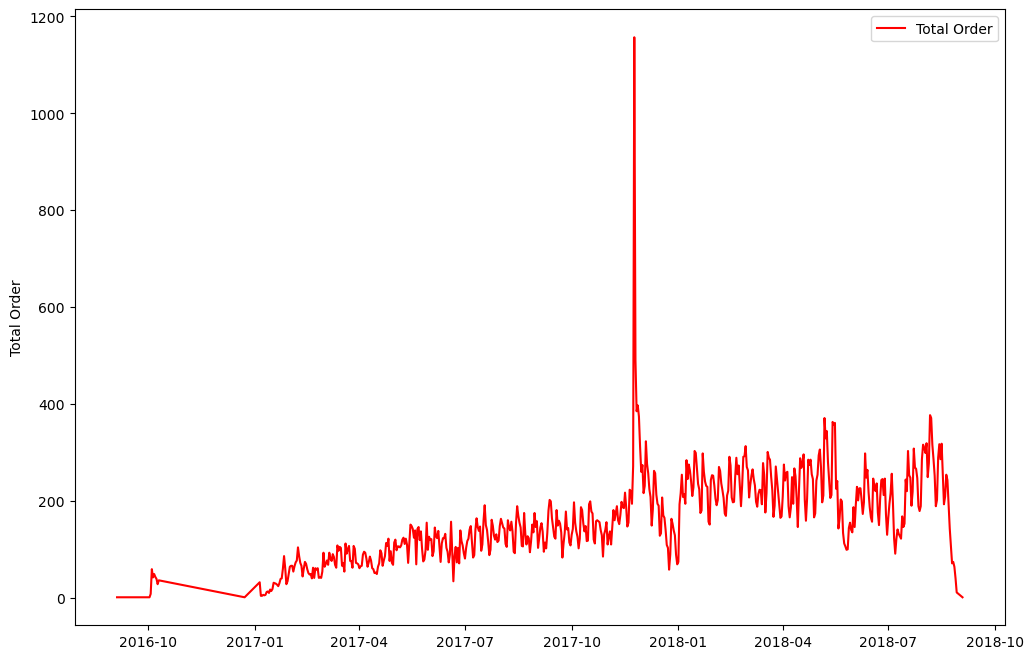

In [74]:
plt.figure(figsize=(12,8))
plt.plot(df_order1['date'], df_order1['total_order'], color='r', label='Total Order')
plt.ylabel('Total Order')      
plt.legend()
plt.show()

In [75]:
df_order2 = df_eda_fin.groupby('date')['price'].sum().reset_index()
df_order2

,date,price
0,2016-09-04,39.99
1,2016-09-05,59.50
2,2016-10-02,100.00
3,2016-10-03,463.48
4,2016-10-04,9252.87
...,...,...
610,2018-08-26,7615.23
611,2018-08-27,4635.13
612,2018-08-28,3427.32
613,2018-08-29,970.84


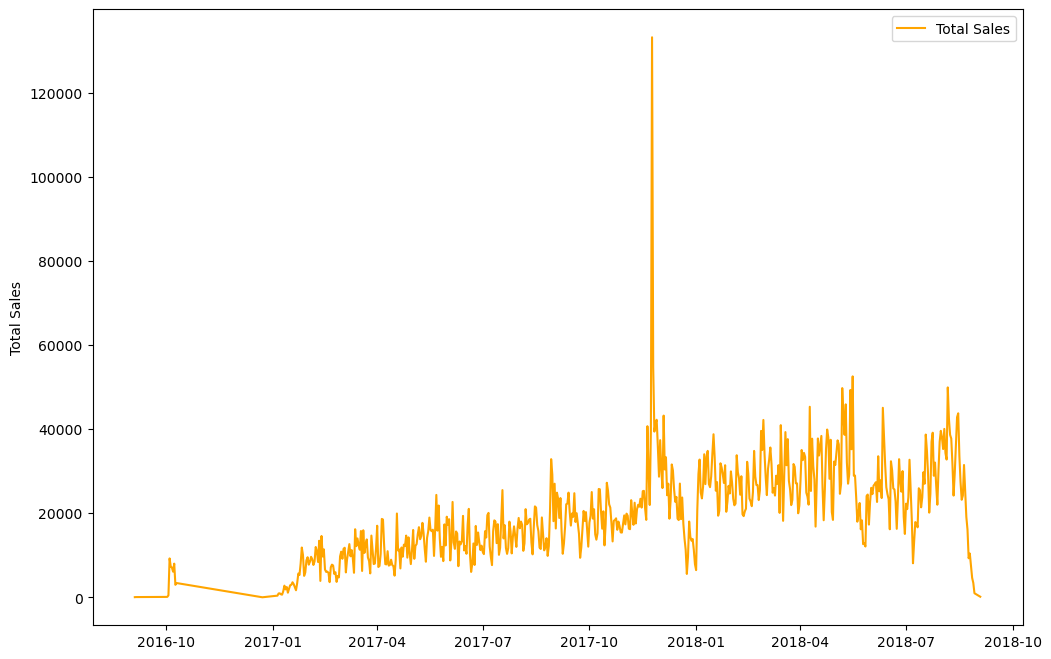

In [76]:
plt.figure(figsize=(12,8))
plt.plot(df_order2['date'], df_order2['price'], color='orange', label='Total Sales')
plt.ylabel('Total Sales')      
plt.legend()
plt.show()

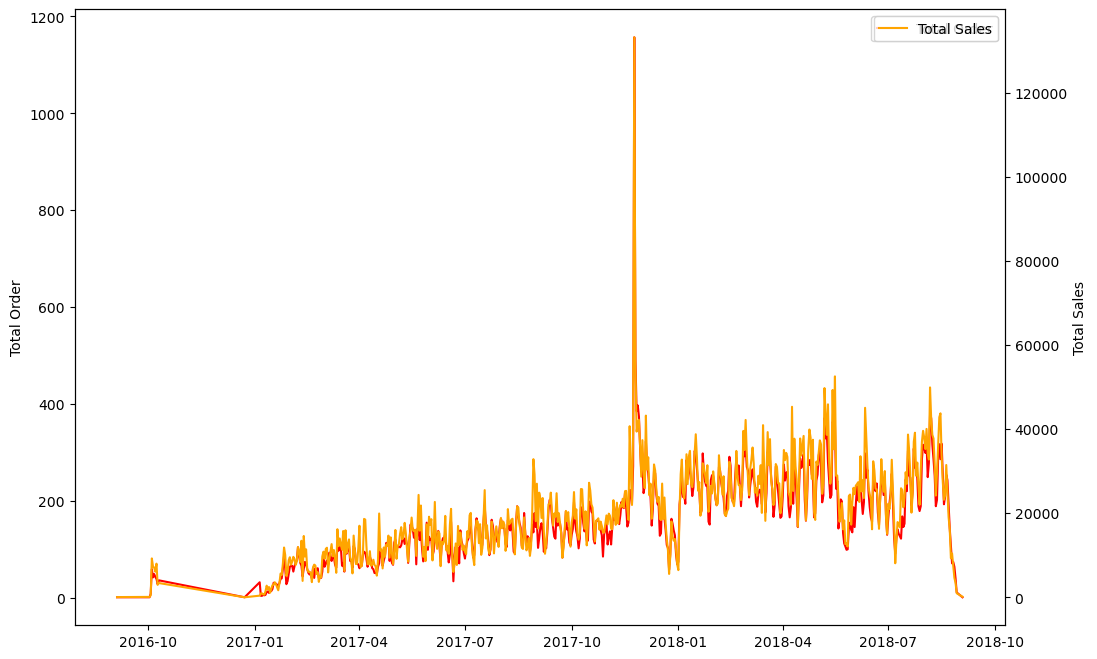

In [77]:
plt.figure(figsize=(12,8))
plt.plot(df_order1['date'], df_order1['total_order'], color='r', label='Total Order')
plt.ylabel('Total Order')      
plt.legend()

axes2 = plt.twinx()
axes2.plot(df_order2['date'], df_order2['price'], color='orange', label='Total Sales')
axes2.set_ylabel('Total Sales')
plt.legend()
plt.show()

The amount of `Total Sales` is correlated with `Total Order`, as the ups and downs are almost the same.

In [78]:
df_order = df_eda_fin.groupby(['year', 'month'])['total_order'].sum().reset_index()
df_order

,year,month,total_order
0,2016,9,2
1,2016,10,305
2,2016,12,1
3,2017,1,773
4,2017,2,1685
5,2017,3,2576
6,2017,4,2329
7,2017,5,3575
8,2017,6,3165
9,2017,7,3952


Text(0, 0.5, 'Total Sales')

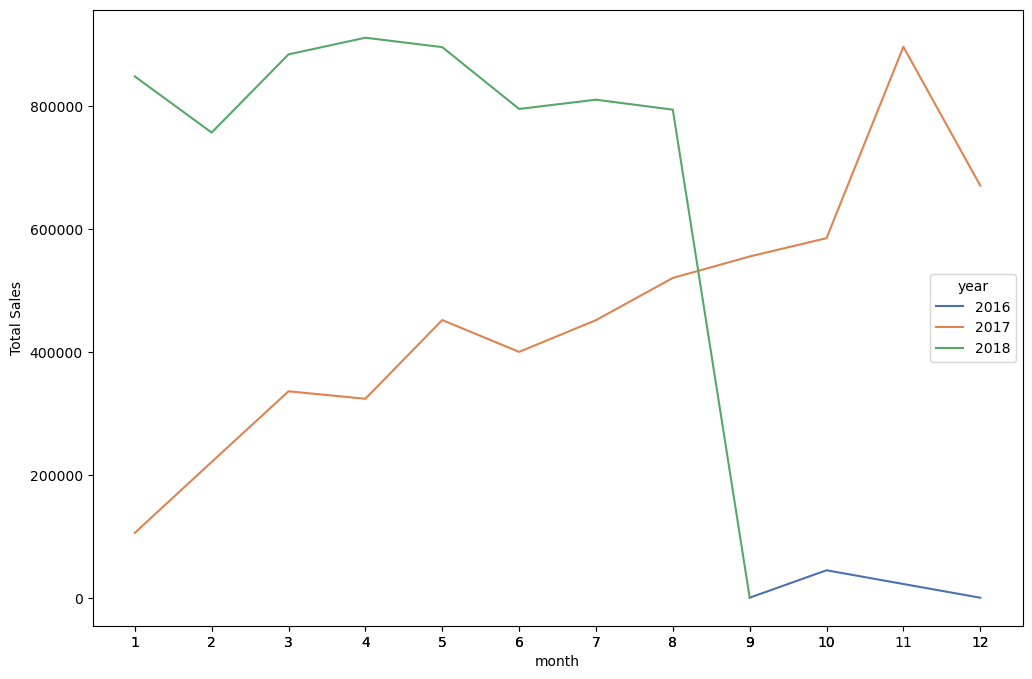

In [79]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=df_price, x='month', y='price', hue='year', palette='deep', legend='full')
ax.set(xticks=df_price.month.values)
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Order')

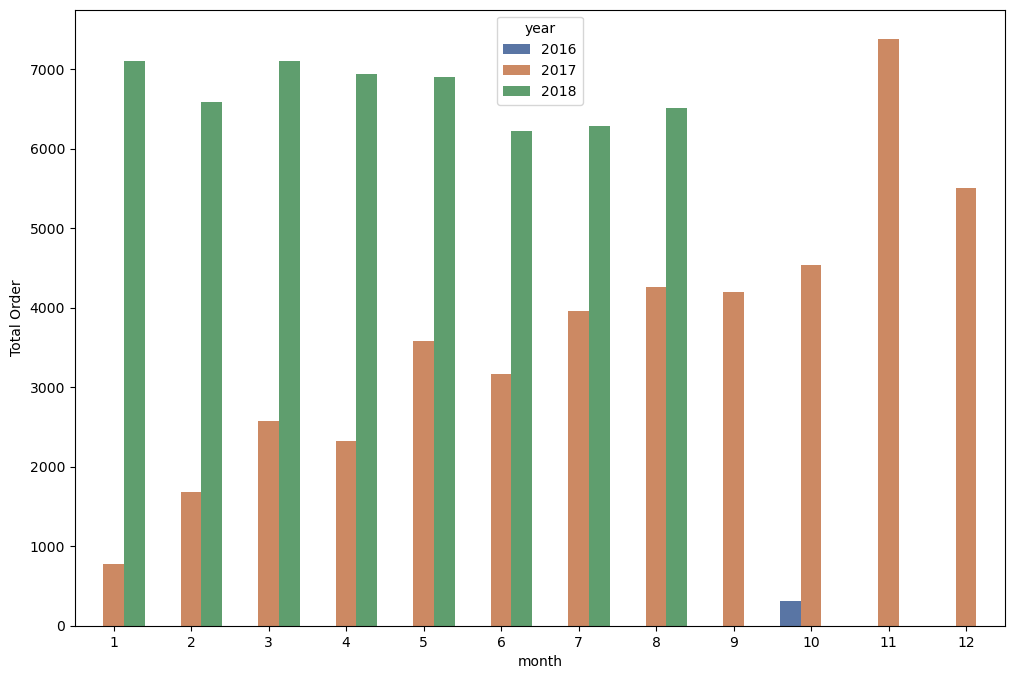

In [80]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_order, x='month', y='total_order', hue='year', palette='deep')
plt.ylabel('Total Order')

### Which State Has the Most Sellers?

<Axes: xlabel='seller_state'>

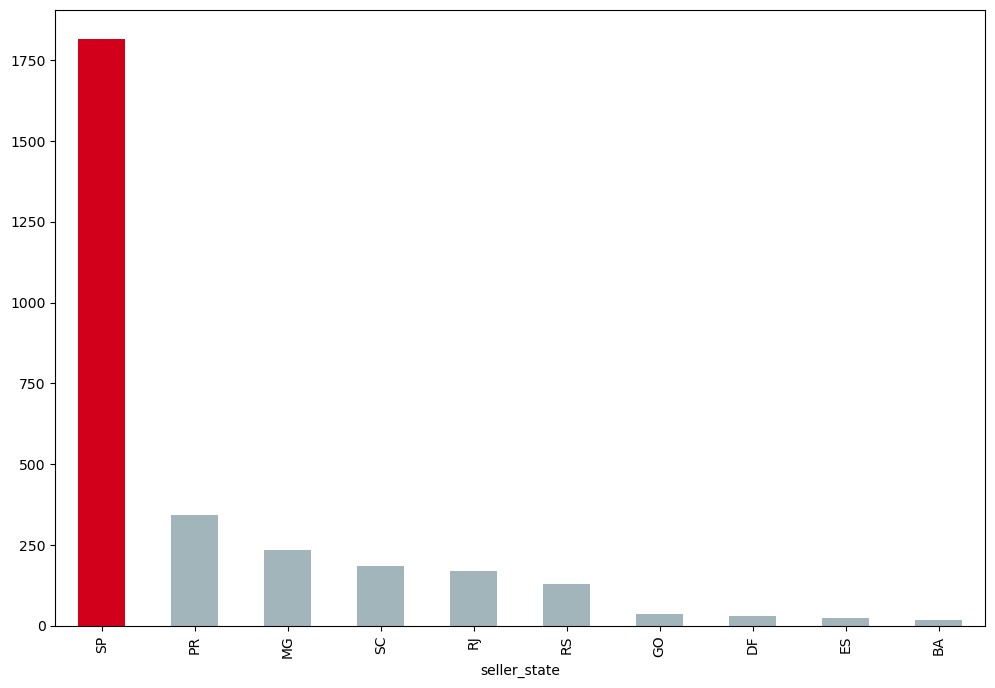

In [81]:
plt.figure(figsize=(12,8))
df_eda_fin.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False).iloc[:10].plot(kind='bar', color=('#D2001A', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB'))


### What Product Does Most Sellers Are Selling?

In [82]:
df_prod_sell = df_eda_fin.groupby(['product_category']).agg(
    total_seller = ('seller_id', 'nunique')
).sort_values(by='total_seller', ascending=False).reset_index()

df_prod_sell.head(10)

,product_category,total_seller
0,health_beauty,491
1,sports_leisure,481
2,housewares,467
3,auto,381
4,furniture_decor,369
5,computers_accessories,287
6,cool_stuff,263
7,toys,251
8,baby,242
9,garden_tools,235


Text(0.5, 0, 'Product Category')

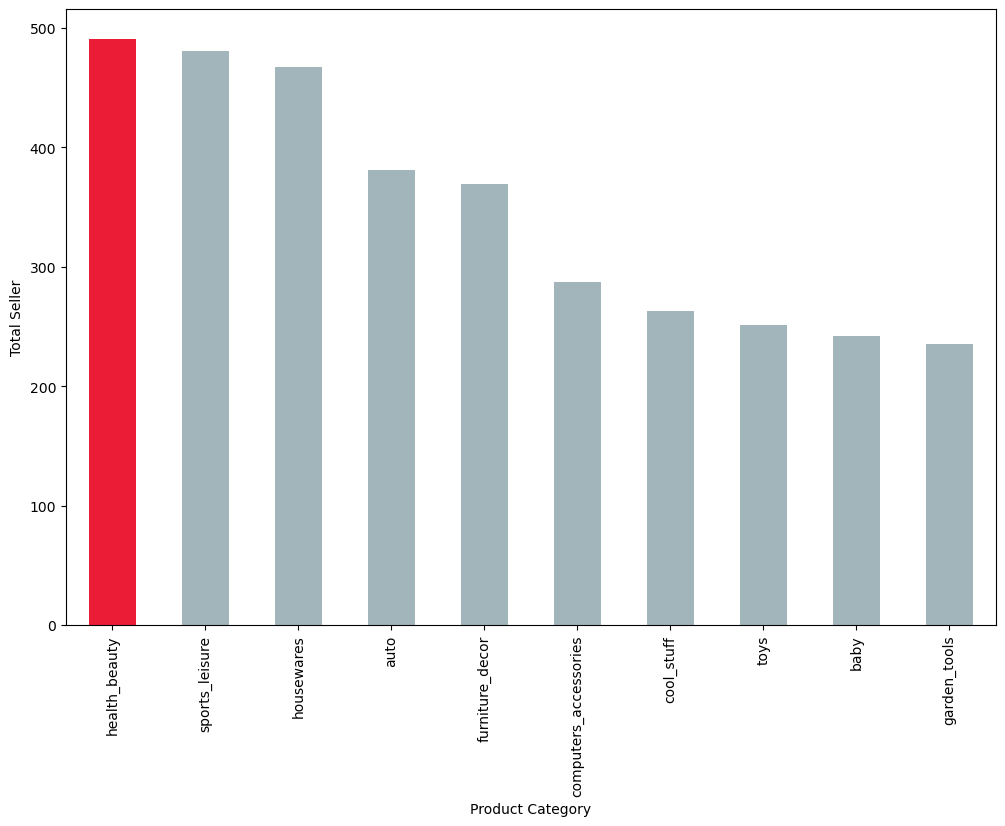

In [83]:
plt.figure(figsize=(12,8))
df_prod_sell.groupby('product_category')['total_seller'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar', color=('#EB1D36', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB'))
plt.ylabel('Total Seller')
plt.xlabel('Product Category')

### What are the characteristics of top seller?

Text(0, 0.5, 'Total Order')

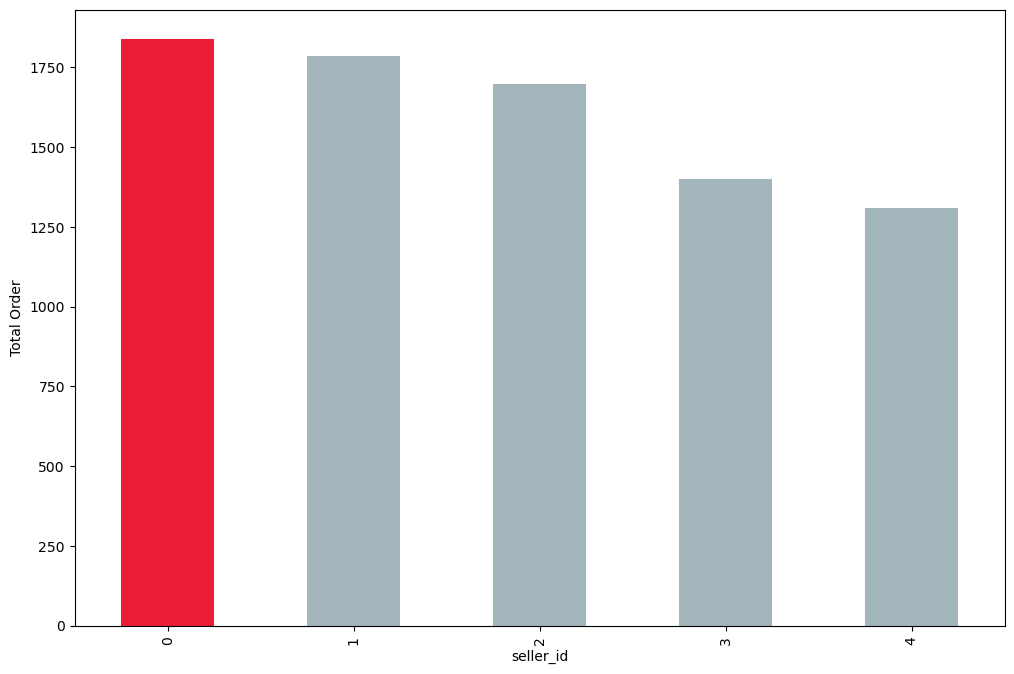

In [84]:
plt.figure(figsize=(12,8))
df_eda_fin.groupby('seller_id')['total_order'].sum().sort_values(ascending=False).iloc[:5].plot(kind='bar', color=('#EB1D36', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB'), xticks=[0, 1, 2, 3, 4])
plt.ylabel('Total Order')

In [85]:
df_eda_fin.groupby('seller_id')['total_order'].sum().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    1838
4a3ca9315b744ce9f8e9374361493884    1785
cc419e0650a3c5ba77189a1882b7556a    1698
1f50f920176fa81dab994f9023523100    1399
da8622b14eb17ae2831f4ac5b9dab84a    1308
                                    ... 
dadc51ef321949ec9a3ab25cd902e23d       1
0f94588695d71662beec8d883ffacf09       1
6e85dc5ecd97a61094b89b046a509d8e       1
0f80a40c312b2472dca482cf50f5186f       1
43753b27d77860f1654aa72e251a7878       1
Name: total_order, Length: 3042, dtype: int64

In [86]:
df_top_seller = df_eda_fin[df_eda_fin['seller_id'] == '6560211a19b47992c3666cc44a7e94c0']
df_top_seller.groupby(['order_status']).agg(
    median_review_score = ('review_score', 'median'),
    median_payment_value = ('payment_value', 'median'),
    median_price_per_item = ('price', 'median'),
    median_freight_value = ('freight_value', 'median'),
    median_handed_to_courier_time = ('handed_to_courier_time', 'median'),
    median_delivery_time = ('delivery_time', 'median'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum'),
)

,median_review_score,median_payment_value,median_price_per_item,median_freight_value,median_handed_to_courier_time,median_delivery_time,total_prod,total_order
order_status,,,,,,,,
canceled,1.0,81.89,58.0,16.89,2.0,0.0,8,7
delivered,5.0,67.44,49.0,14.10,1.0,9.0,2076,1805
invoiced,2.0,93.97,69.0,24.97,0.0,0.0,3,3
shipped,1.0,72.32,56.0,14.76,2.0,2.0,24,23


In [87]:
df_top_seller.groupby('year')['total_order'].sum().reset_index()

,year,total_order
0,2017,846
1,2018,992


In [88]:
df_tops = df_top_seller.groupby('product_category')['total_order'].sum().sort_values(ascending=False).reset_index()
df_tops

,product_category,total_order
0,watches_gifts,1454
1,fashion_bags_accessories,323
2,audio,30
3,computers_accessories,12
4,perfumery,11
5,sports_leisure,7
6,construction_tools_safety,1


Text(0, 0.5, 'Product Category')

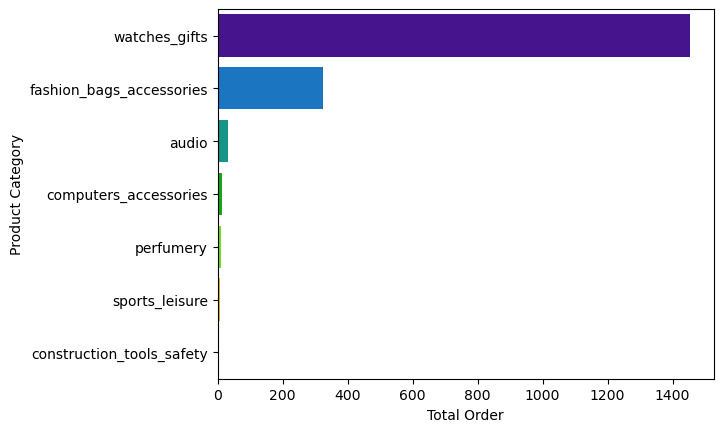

In [89]:
sns.barplot(data=df_tops, y='product_category', x='total_order', palette='nipy_spectral')
plt.xlabel('Total Order')
plt.ylabel('Product Category')

### Correlation

C:\Users\Milka\AppData\Local\Temp\ipykernel_13680\2492910025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_eda_fin.corr()


<Axes: >

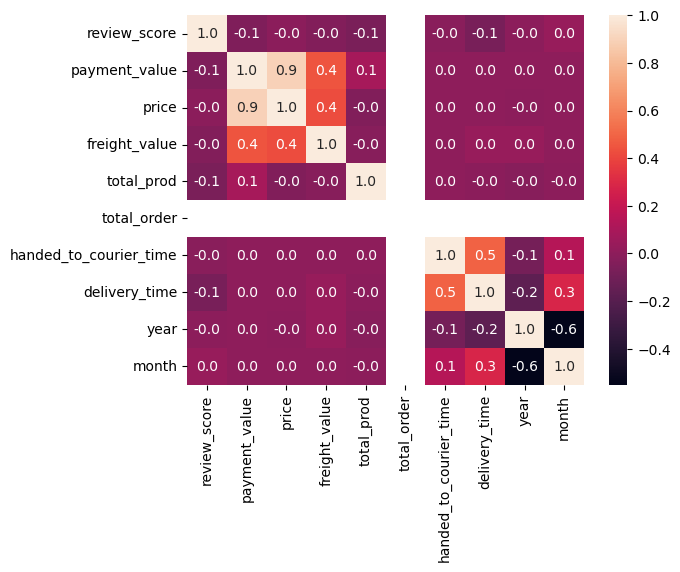

In [90]:
df_corr = df_eda_fin.corr()
sns.heatmap(df_corr, annot=True, fmt='.1f')

## Grouping by Seller

In [91]:
df_eda_fin.groupby(['seller_id', 'order_status']).agg(
    avg_review_score = ('review_score', 'mean'),
    avg_payment_value = ('payment_value', 'mean'),
    avg_price_per_item = ('price', 'mean'),
    avg_freight_value = ('freight_value', 'mean'),
    avg_handed_to_courier_time = ('handed_to_courier_time', 'mean'),
    avg_delivery_time = ('delivery_time', 'mean'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum')
)

avg_review_score  \
seller_id                        order_status                     
0015a82c2db000af6aaaf3ae2ecb0532 delivered             3.666667   
001cca7ae9ae17fb1caed9dfb1094831 delivered             4.062500   
                                 shipped               1.000000   
001e6ad469a905060d959994f1b41e4f canceled              1.000000   
002100f778ceb8431b7a1020ff7ab48f delivered             3.960000   
...                                                         ...   
fffd5413c0700ac820c7069d66d98c89 delivered             3.892857   
                                 shipped               4.000000   
ffff564a4f9085cd26170f4732393726 canceled              1.500000   
                                 delivered             3.250000   
                                 processing            1.250000   

                                               avg_payment_value  \
seller_id                        order_status                      
0015a82c2db000af6aaaf3ae2ecb0532 delivered            916.020000   
001cca7ae9ae17fb1caed9dfb1094831 delivered            170.113438   
                                 shipped              158.254000   
001e6ad469a905060d959994f1b41e4f canceled             267.940000   
002100f778ceb8431b7a1020ff7ab48f delivered             41.614200   
...                                                          ...   
fffd5413c0700ac820c7069d66d98c89 delivered            195.955714   
                                 shipped              318.485000   
ffff564a4f9085cd26170f4732393726 canceled             168.577500   
                                 delivered             59.293750   
                                 processing            77.775000   

                                               avg_price_per_item  \
seller_id                        order_status                       
0015a82c2db000af6aaaf3ae2ecb0532 delivered             895.000000   
001cca7ae9ae17fb1caed9dfb1094831 delivered             104.851250   
                                 shipped               118.600000   
001e6ad469a905060d959994f1b41e4f canceled              250.000000   
002100f778ceb8431b7a1020ff7ab48f delivered              22.940000   
...                                                           ...   
fffd5413c0700ac820c7069d66d98c89 delivered             145.869643   
                                 shipped               213.750000   
ffff564a4f9085cd26170f4732393726 canceled              148.662500   
                                 delivered              44.875000   
                                 processing             59.081250   

                                               avg_freight_value  \
seller_id                        order_status                      
0015a82c2db000af6aaaf3ae2ecb0532 delivered             21.020000   
001cca7ae9ae17fb1caed9dfb1094831 delivered             37.530052   
                                 shipped               39.654000   
001e6ad469a905060d959994f1b41e4f canceled              17.940000   
002100f778ceb8431b7a1020ff7ab48f delivered             14.493200   
...                                                          ...   
fffd5413c0700ac820c7069d66d98c89 delivered             43.676964   
                                 shipped              104.735000   
ffff564a4f9085cd26170f4732393726 canceled              19.915000   
                                 delivered             14.418750   
                                 processing            18.693750   

                                               avg_handed_to_courier_time  \
seller_id                        order_status                               
0015a82c2db000af6aaaf3ae2ecb0532 delivered                       3.333333   
001cca7ae9ae17fb1caed9dfb1094831 delivered                      53.859375   
                                 shipped                         2.000000   
001e6ad469a905060d959994f1b41e4f canceled                        0.000000   
002100f778ceb8431b7a1020ff7ab48f delivered   

In [92]:
group_sc = df_eda_fin.groupby(['seller_id']).agg(
    median_review_score = ('review_score', 'median'),
    median_payment_value = ('payment_value', 'median'),
    median_price_per_item = ('price', 'median'),
    median_freight_value = ('freight_value', 'median'),
    median_handed_to_courier_time = ('handed_to_courier_time', 'median'),
    median_delivery_time = ('delivery_time', 'median'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum')
).reset_index()

group_sc.head()

,seller_id,median_review_score,median_payment_value,median_price_per_item,median_freight_value,median_handed_to_courier_time,median_delivery_time,total_prod,total_order
0,0015a82c2db000af6aaaf3ae2ecb0532,5.0,916.02,895.00,21.02,3.0,12.0,3,3
1,001cca7ae9ae17fb1caed9dfb1094831,5.0,144.99,99.00,36.93,2.0,14.0,238,197
2,001e6ad469a905060d959994f1b41e4f,1.0,267.94,250.00,17.94,0.0,0.0,1,1
3,002100f778ceb8431b7a1020ff7ab48f,5.0,33.00,17.90,15.10,4.0,19.0,59,51
4,004c9cd9d87a3c30c522c48c4fc07416,5.0,130.32,109.99,17.83,1.0,16.5,169,144


In [93]:
group_sc.drop(columns='seller_id', inplace=True)

In [94]:
group_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   median_review_score            3042 non-null   float64
 1   median_payment_value           3042 non-null   float64
 2   median_price_per_item          3042 non-null   float64
 3   median_freight_value           3042 non-null   float64
 4   median_handed_to_courier_time  3042 non-null   float64
 5   median_delivery_time           3042 non-null   float64
 6   total_prod                     3042 non-null   int64  
 7   total_order                    3042 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 190.3 KB


<Axes: >

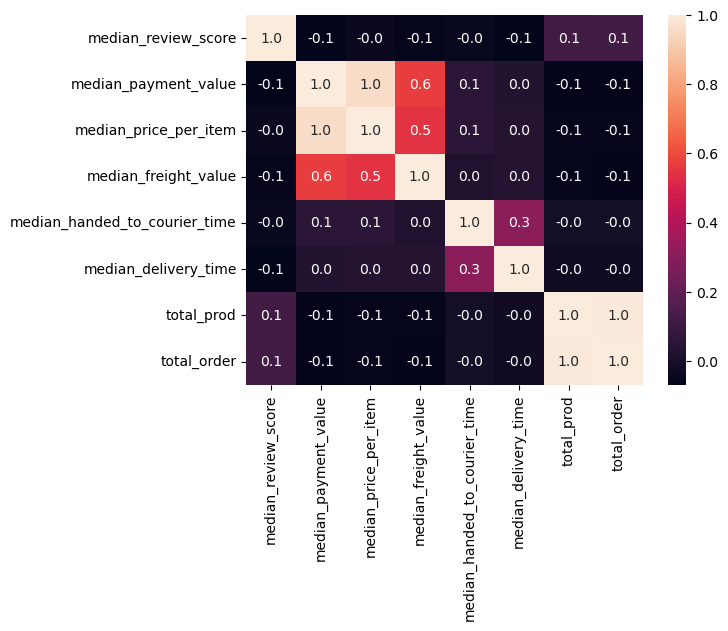

In [95]:
gr_corr = group_sc.corr()
sns.heatmap(gr_corr, annot=True, fmt='.1f')

## Customer Segmentation (Non-SP)

In [96]:
df_non_SP = df_eda_fin[df_eda_fin['customer_state'] != 'SP']
df_non_SP.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,...,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month,date
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,...,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances,2017,10,2017-10-18
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances,2017,10,2017-10-12
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances,2017,9,2017-09-26
6,001cca7ae9ae17fb1caed9dfb1094831,03c765107c8fc34c68a82bbd6c686856,e251ebd2858be1aa7d9b2087a6992580,5,126.95,112.0,14.95,1,1,ES,...,RJ,2017-04-09 20:15:45,2017-04-10 12:26:52,2017-04-17 12:04:56,1.0,8.0,garden_tools,2017,4,2017-04-09
10,001cca7ae9ae17fb1caed9dfb1094831,07dba073c2b18c2c748f28ed51c87ee8,08574b074924071f4e201e151b152b4e,5,147.01,101.0,46.01,1,1,ES,...,SC,2018-02-08 21:14:22,2018-02-14 21:45:16,2018-03-09 01:19:23,6.0,101.0,garden_tools,2018,2,2018-02-08


In [97]:
df_non_SP1 = df_non_SP.groupby(['customer_id', 'order_status']).agg(
    med_review_score = ('review_score', 'median'),
    med_payment_value = ('payment_value', 'median'),
    med_price_per_item = ('price', 'median'),
    med_freight_value = ('freight_value', 'median'),
    med_handed_to_courier_time = ('handed_to_courier_time', 'median'),
    med_delivery_time = ('delivery_time', 'median'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum')
).reset_index()

In [98]:
df_non_SP1.drop(columns=['customer_id'], inplace=True)                

In [99]:
df_non_SP1.head()

,order_status,med_review_score,med_payment_value,med_price_per_item,med_freight_value,med_handed_to_courier_time,med_delivery_time,total_prod,total_order
0,0,4.5,98.895,87.50,11.395,0.0,0.0,2,2
1,delivered,4.0,67.410,54.90,12.510,3.0,9.0,1,1
2,delivered,5.0,195.420,179.99,15.430,73.0,78.0,1,1
3,delivered,5.0,179.350,149.90,29.450,3.0,97.0,1,1
4,delivered,1.0,49.400,34.30,15.100,5.0,115.0,1,1


In [100]:
df_non_SP1 = pd.get_dummies(df_non_SP1, columns = ['order_status'])

C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, 'WCSS')

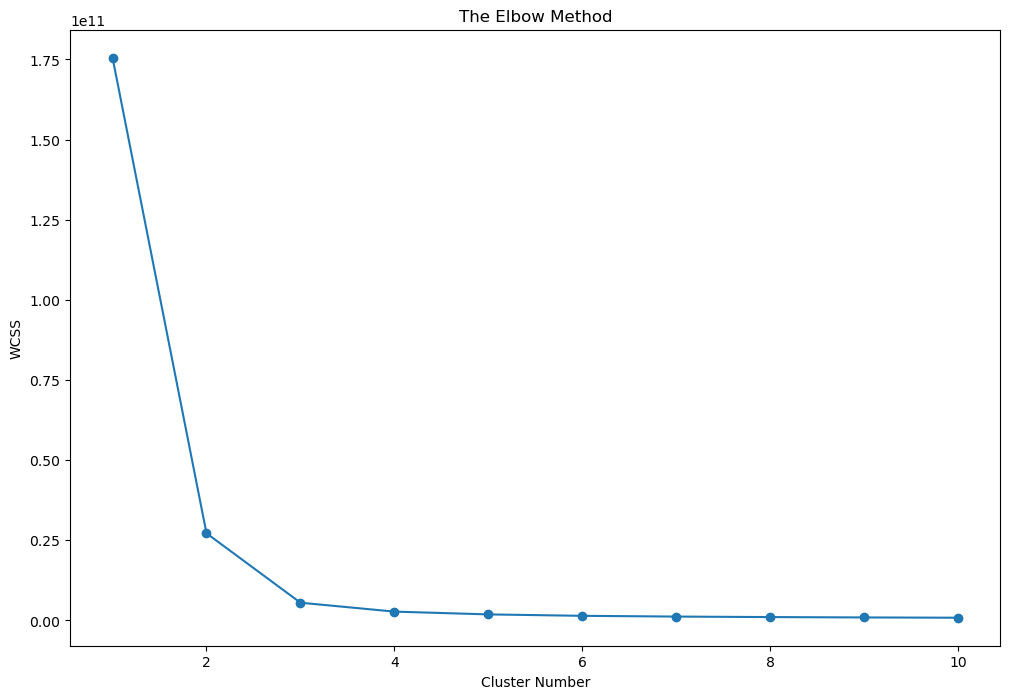

In [101]:
#Scale
from sklearn.preprocessing import StandardScaler

df_scale = df_non_SP1
sc = StandardScaler()
df_scale_fit = sc.fit_transform(df_scale)
new_df = pd.DataFrame(data=df_non_SP1)

#Elbow Method
from sklearn.cluster import KMeans

wcss = []
for x in range (1,11):
  kmeans = KMeans(n_clusters = x, init='k-means++', random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')



In [102]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(df_non_SP1.astype(float))

In [103]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_std)

C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [104]:
df_data_std = pd.DataFrame(data=data_std, columns=list(df_non_SP1))

In [105]:
df_data_std['clusters'] = kmeans.labels_
df_non_SP1['clusters'] = kmeans.labels_

In [106]:
# PCA
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_data_std)
pcs = pca.transform(df_data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_non_SP1['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,2.846038,-8.447307,0
1,-0.824003,-0.178531,0
2,-0.205427,0.370424,0
3,-0.005085,0.464376,0
4,-0.528368,-0.777950,0


In [107]:
data_pca['clusters'].value_counts()

0    55276
1      727
Name: clusters, dtype: int64

<Axes: xlabel='PC 1', ylabel='PC 2'>

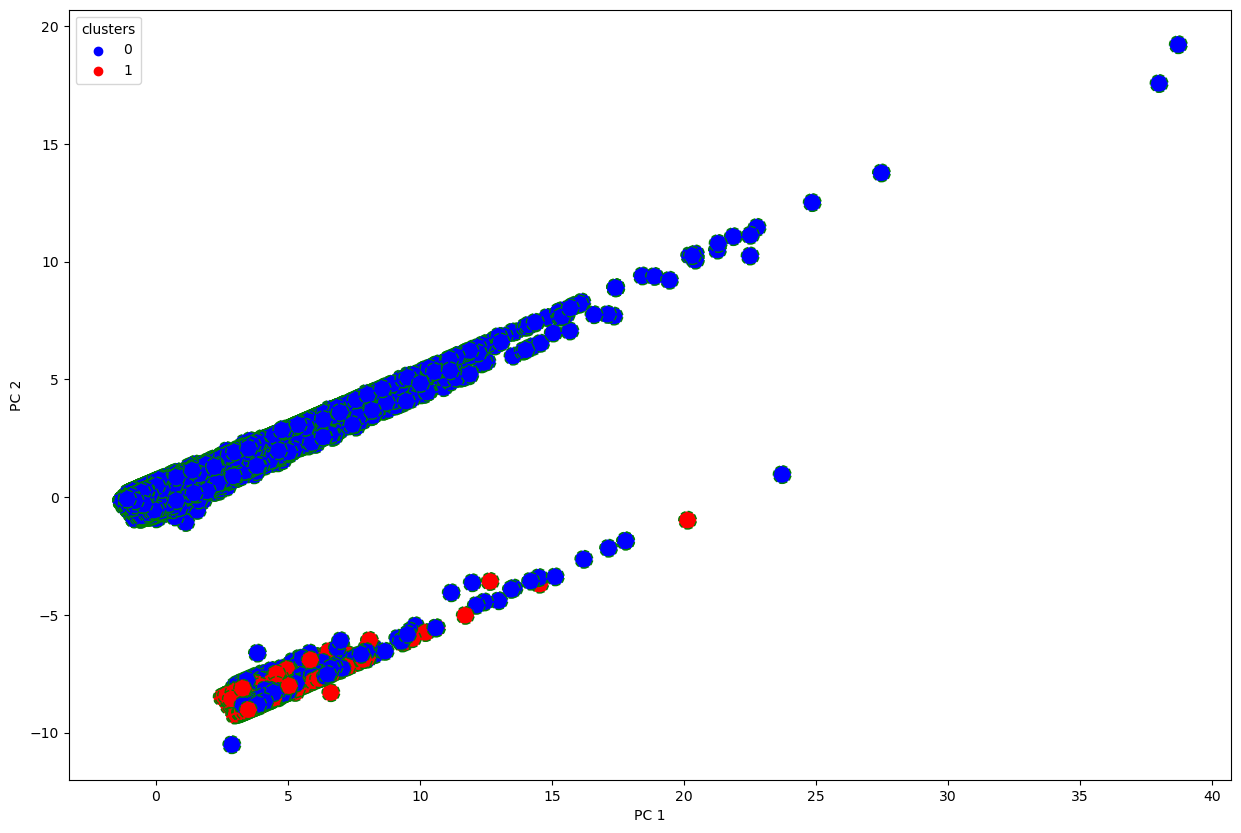

In [108]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red'],
    s=160,
    ax=ax
)

In [109]:
pd.set_option('display.max_columns', 500)
display(df_non_SP1.groupby('clusters').agg(['mean','median']))

med_review_score        med_payment_value           \
                     mean median              mean   median   
clusters                                                      
0                4.067344    5.0        168.969188  110.865   
1                1.927098    1.0        168.011761  105.290   

         med_price_per_item        med_freight_value         \
                       mean median              mean median   
clusters                                                      
0                133.698248   83.9         23.729225  18.28   
1                137.397662   80.0         25.372256  19.34   

         med_handed_to_courier_time        med_delivery_time         \
                               mean median              mean median   
clusters                                                              
0                         62.765821    2.0        349.541197   18.0   
1                         60.228336    3.0         60.228336    3.0   

         total_prod        total_order        order_status_0         \
               mean median        mean median           mean median   
clusters                                                              
0          1.194262    1.0    1.013188    1.0       0.000018    0.0   
1          1.151307    1.0    1.000000    1.0       0.000000    0.0   

         order_status_approved        order_status_canceled         \
                          mean median                  mean median   
clusters                                                             
0                     0.000018    0.0              0.003691    0.0   
1                     0.000000    0.0              0.000000    0.0   

         order_status_delivered        order_status_invoiced         \
                           mean median                  mean median   
clusters                                                              
0                      0.990538    1.0              0.002768    0.0   
1                      0.000000    0.0              0.000000    0.0   

         order_status_processing        order_status_shipped         \
                            mean median                 mean median   
clusters                                                              
0                       0.002913    0.0                  0.0    0.0   
1                       0.000000    0.0                  1.0    1.0   

         order_status_unavailable         
                             mean median  
clusters                                  
0                        0.000054    0.0  
1                        0.000000    0.0

The purchase between cluster is not that different. But the customer in cluster 0 rate the seller lower than those in cluster 1, in which could be because the delivery time up to ~1889 days while the cluster 1 only need ~10days.
There is more possibility that customer in Cluster 0 canceling the order instead of Cluster 1.

## Customer Segmentation (SP)

In [110]:
df_SP = df_eda_fin[df_eda_fin['customer_state'] == 'SP']
df_SP.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month,date
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,23bfd4316e261786deed5a08231c75bc,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools,2017,5,2017-05-11
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,a5ced4926d7d8fa71e9be2b007720356,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools,2017,6,2017-06-08
5,001cca7ae9ae17fb1caed9dfb1094831,0240c9d87266e4cabc3bacdcdc6e77e4,547b95702aec86f05ac37e61d164891c,5,163.98,129.0,34.98,1,1,ES,9ff020a259deb59e7cd97016824d8039,delivered,SP,2018-06-12 08:40:31,2018-06-12 14:18:00,2018-06-18 15:52:15,0.0,6.0,garden_tools,2018,6,2018-06-12
7,001cca7ae9ae17fb1caed9dfb1094831,06c07d5b2696b9631375e2877c955b3b,08574b074924071f4e201e151b152b4e,4,132.08,99.0,33.08,1,1,ES,5fb9d23a8af73d1d81be9447185a10f7,delivered,SP,2017-11-06 18:08:17,2017-11-08 19:28:44,2017-11-13 20:28:45,2.0,7.0,garden_tools,2017,11,2017-11-06
8,001cca7ae9ae17fb1caed9dfb1094831,072d46cbc49c2ee26ddde8f25d22f617,e251ebd2858be1aa7d9b2087a6992580,5,165.98,129.0,36.98,1,1,ES,1966b090f543e7faae8d35fbd5b19137,delivered,SP,2017-09-12 21:58:21,2017-09-14 16:24:01,2017-09-29 14:17:00,2.0,17.0,garden_tools,2017,9,2017-09-12


In [111]:
df_SP1 = df_SP.groupby(['customer_id', 'order_status']).agg(
    med_review_score = ('review_score', 'median'),
    med_payment_value = ('payment_value', 'median'),
    med_price_per_item = ('price', 'median'),
    med_freight_value = ('freight_value', 'median'),
    med_handed_to_courier_time = ('handed_to_courier_time', 'median'),
    med_delivery_time = ('delivery_time', 'median'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum')
).reset_index()

In [112]:
df_SP1.drop(columns=['customer_id'], inplace=True)                

In [113]:
df_SP1.head()

,order_status,med_review_score,med_payment_value,med_price_per_item,med_freight_value,med_handed_to_courier_time,med_delivery_time,total_prod,total_order
0,delivered,1.0,114.74,89.80,24.94,3.0,14.0,1,1
1,delivered,4.0,107.01,93.00,14.01,2.0,11.0,1,1
2,delivered,1.0,71.80,59.99,11.81,0.0,8.0,1,1
3,delivered,4.0,147.33,134.90,12.43,1.0,2.0,1,1
4,delivered,3.0,58.95,47.99,10.96,2.0,9.0,1,1


In [114]:
df_SP1 = pd.get_dummies(df_SP1, columns = ['order_status'])

C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, 'WCSS')

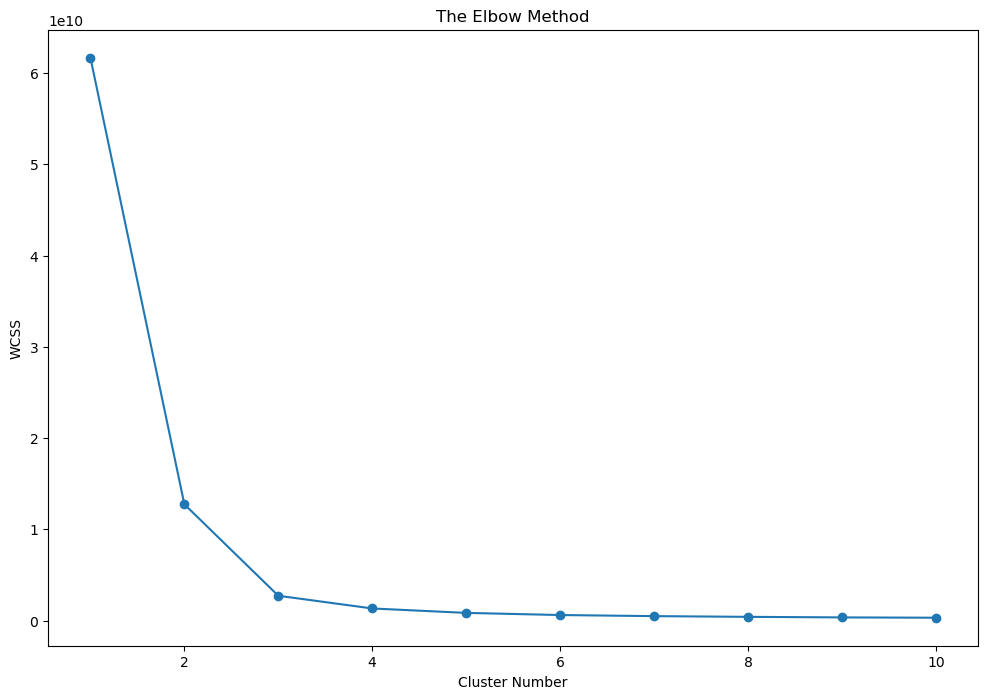

In [115]:
#Scale
from sklearn.preprocessing import StandardScaler

df_scale = df_SP1
sc = StandardScaler()
df_scale_fit = sc.fit_transform(df_scale)
new_df = pd.DataFrame(data=df_SP1)

#Elbow Method
from sklearn.cluster import KMeans

wcss = []
for x in range (1,11):
  kmeans = KMeans(n_clusters = x, init='k-means++', random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')



In [116]:
sc_data = StandardScaler()
data_std1 = sc_data.fit_transform(df_SP1.astype(float))

In [117]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_std1)

C:\Users\Milka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [118]:
df_data_std1 = pd.DataFrame(data=data_std1, columns=list(df_SP1))

In [119]:
df_data_std1['clusters'] = kmeans.labels_
df_SP1['clusters'] = kmeans.labels_

In [120]:
# PCA
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_data_std1)
pcs1 = pca.transform(df_data_std1)

data_pca1 = pd.DataFrame(data = pcs1, columns = ['PC 1', 'PC 2'])
data_pca1['clusters'] = df_SP1['clusters']
data_pca1.head()

,PC 1,PC 2,clusters
0,0.509580,-0.473608,1
1,-0.290969,0.023628,1
2,-0.202907,-0.813876,1
3,-0.091808,0.120908,1
4,-0.567432,-0.403032,1


In [121]:
data_pca1['clusters'].value_counts()

1    39721
0      836
Name: clusters, dtype: int64

<Axes: xlabel='PC 1', ylabel='PC 2'>

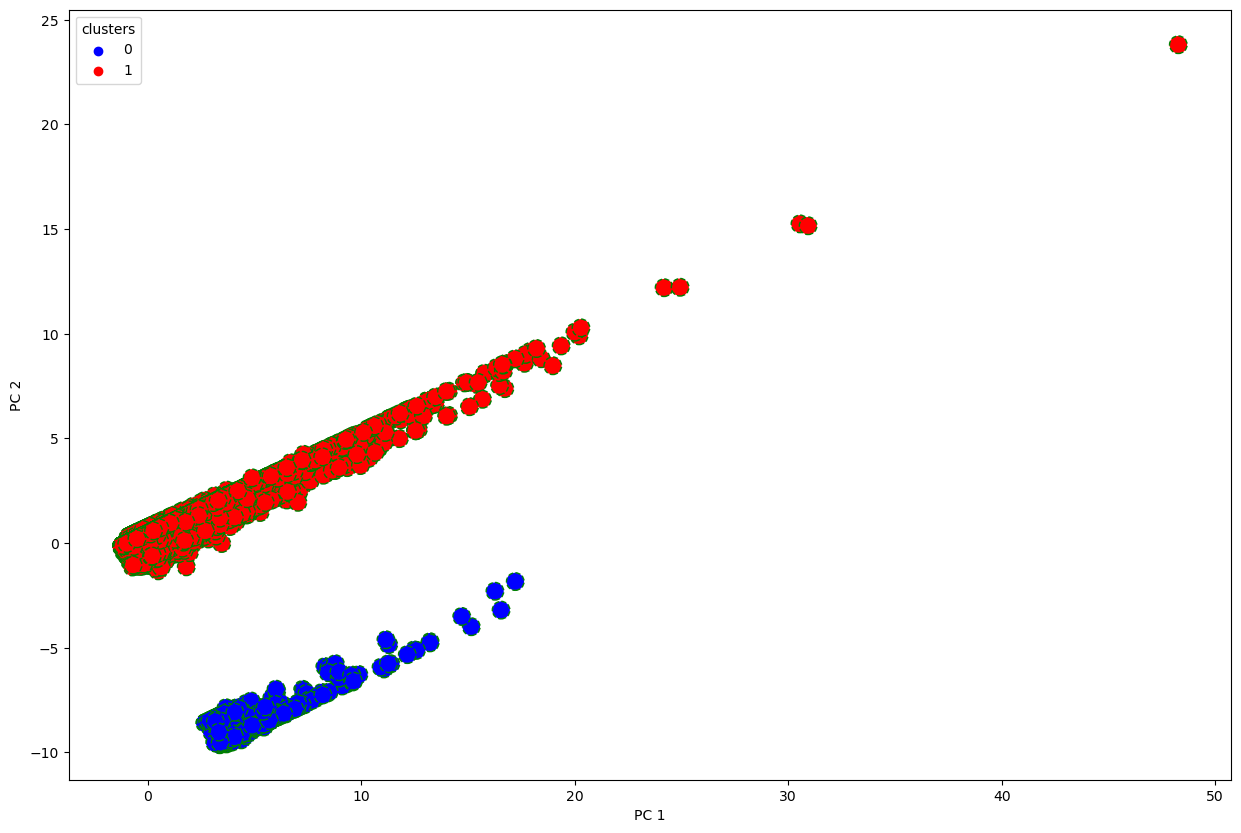

In [122]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca1,
    palette=['blue','red'],
    s=160,
    ax=ax
)

In [123]:
pd.set_option('display.max_columns', 500)
display(df_SP1.groupby('clusters').agg(['mean','median']))

med_review_score        med_payment_value         med_price_per_item  \
                     mean median              mean  median               mean   
clusters                                                                        
0                1.740431    1.0        171.535921  103.49         142.609952   
1                4.249641    5.0        139.470730   91.35         114.246095   

                med_freight_value         med_handed_to_courier_time         \
         median              mean  median                       mean median   
clusters                                                                      
0          84.9         16.919264  12.995                  46.649522    0.0   
1          69.9         15.292561  13.070                  63.612434    2.0   

         med_delivery_time        total_prod        total_order         \
                      mean median       mean median        mean median   
clusters                                                                 
0                46.404306    0.0   1.208134    1.0    1.002392    1.0   
1               139.385426    8.0   1.203973    1.0    1.014325    1.0   

         order_status_approved        order_status_canceled         \
                          mean median                  mean median   
clusters                                                             
0                     0.001196    0.0              0.287081    0.0   
1                     0.000000    0.0              0.000000    0.0   

         order_status_delivered        order_status_invoiced         \
                           mean median                  mean median   
clusters                                                              
0                           0.0    0.0              0.184211    0.0   
1                           1.0    1.0              0.000000    0.0   

         order_status_processing        order_status_shipped         \
                            mean median                 mean median   
clusters                                                              
0                       0.160287    0.0             0.363636    0.0   
1                       0.000000    0.0             0.000000    0.0   

         order_status_unavailable         
                             mean median  
clusters                                  
0                        0.003589    0.0  
1                        0.000000    0.0

The purchase between cluster is not that different. But the customer in cluster 1 rate the seller lower than those in cluster 1, in which could be because the customer in this cluster most likely to cancel the order.

# Sales Timeseries Modelling with Daily Data

## Importing Library

In [126]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split,
    ExpandingWindowSplitter,
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline

## Data Preparation

In [127]:
df_sales = df_eda_fin.groupby('date')['price'].sum().reset_index()
df_sales

,date,price
0,2016-09-04,39.99
1,2016-09-05,59.50
2,2016-10-02,100.00
3,2016-10-03,463.48
4,2016-10-04,9252.87
...,...,...
610,2018-08-26,7615.23
611,2018-08-27,4635.13
612,2018-08-28,3427.32
613,2018-08-29,970.84


In [128]:
# change month column to date type
df_sales['date'] = pd.to_datetime(df_sales['date'], format="%Y-%m-%d")

In [129]:
df_sales = df_sales.set_index('date').resample('d').asfreq()

In [130]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2016-09-04 to 2018-09-03
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   615 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [131]:
df_sales = df_sales.fillna(0)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

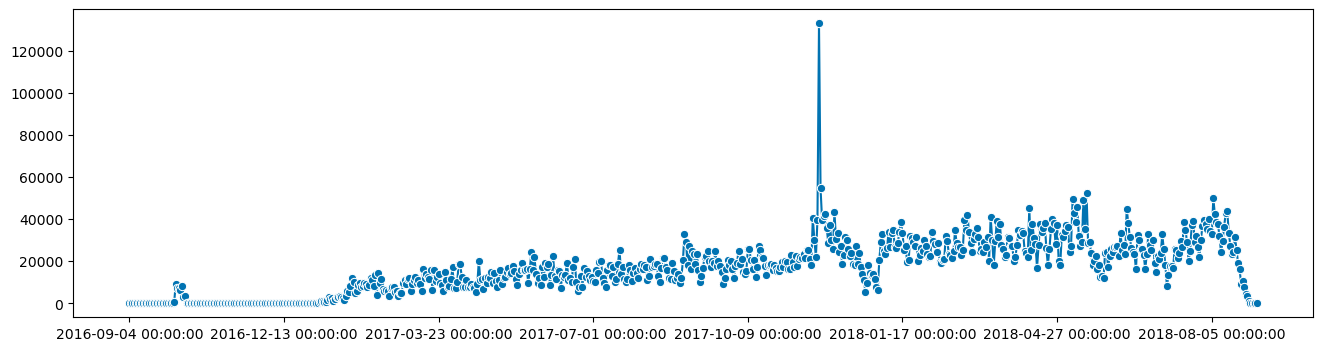

In [133]:
# plot time series data

plot_series(df_sales)

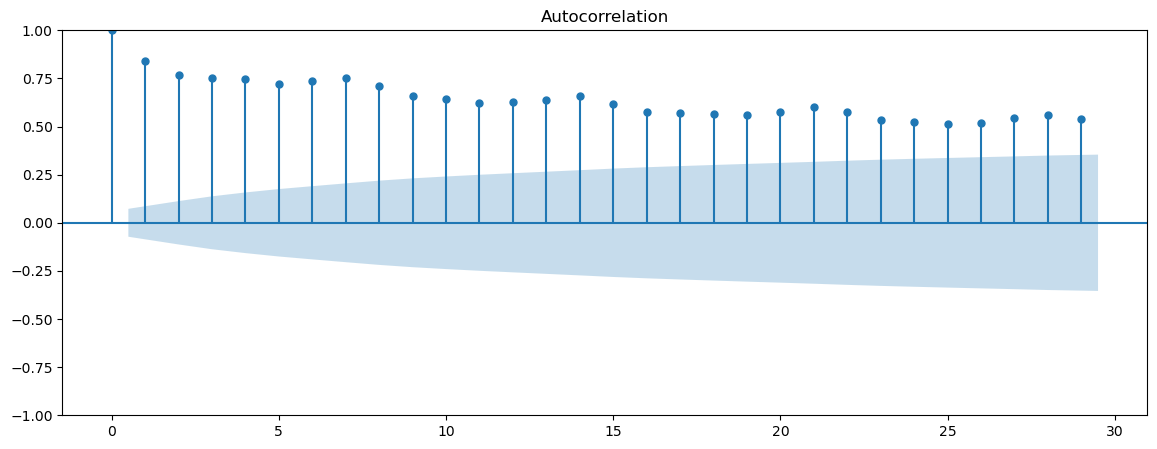

In [134]:
# plot ACF

plot_acf(df_sales).set_size_inches((14,5));

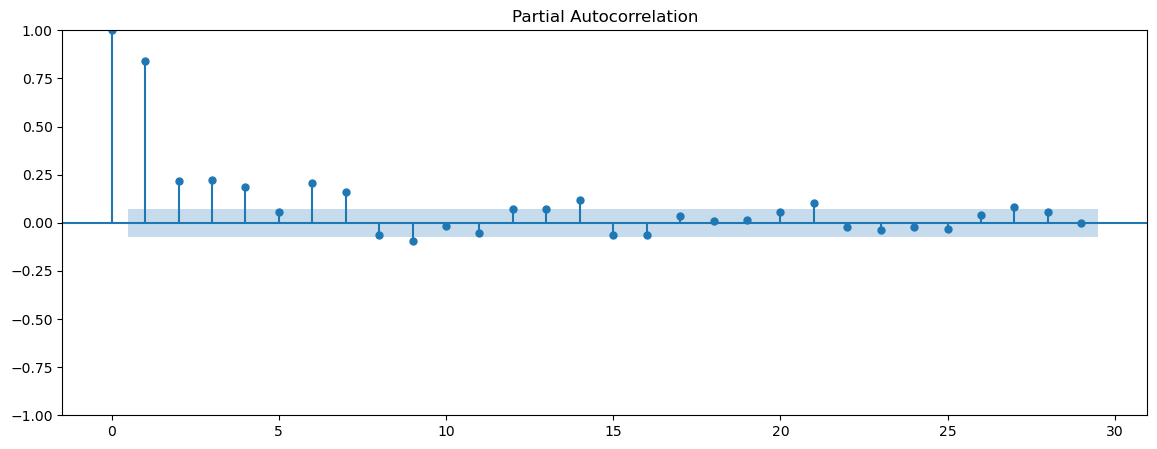

In [135]:
# plot PACF

plot_pacf(df_sales).set_size_inches((14,5));

*Check the Stationary*

- *Null hypothesis*: Series is a trend stationary.
- *Alternate hypothesis*: Series is a non-stationary.

Reject null hypothesis if **p-value less than 5%**

In [136]:
dftest = kpss(df_sales, 'ct')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[3].items():
    print("\t{}: {}".format(k, v))

Test statistic = 0.307
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\Milka\AppData\Local\Temp\ipykernel_13680\1256693018.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  dftest = kpss(df_sales, 'ct')


p-value is lower than 5% which means we reject the null-hypothesis that the data is not a trend stationary.

### Diff Transformation

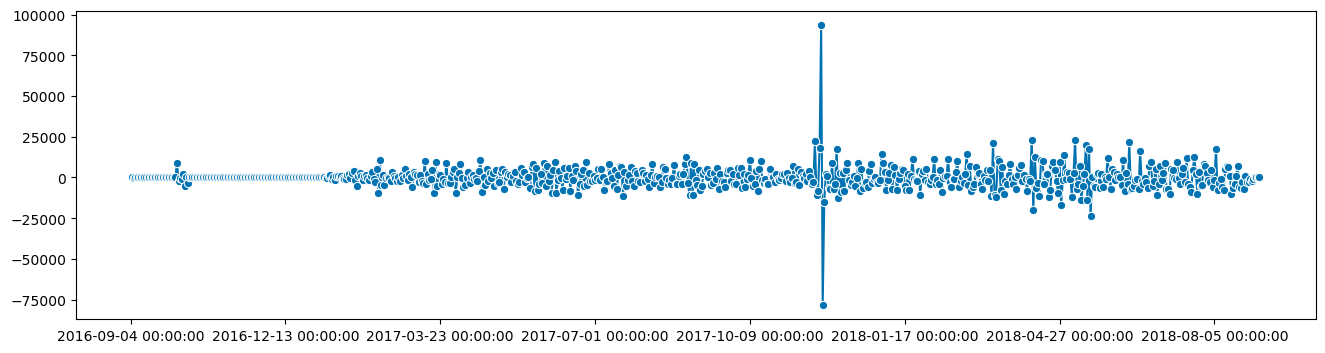

In [137]:
# plot the differentiate time series data

df_sales_diff = df_sales.diff()
df_sales_diff = df_sales_diff.dropna()

plot_series(df_sales_diff);

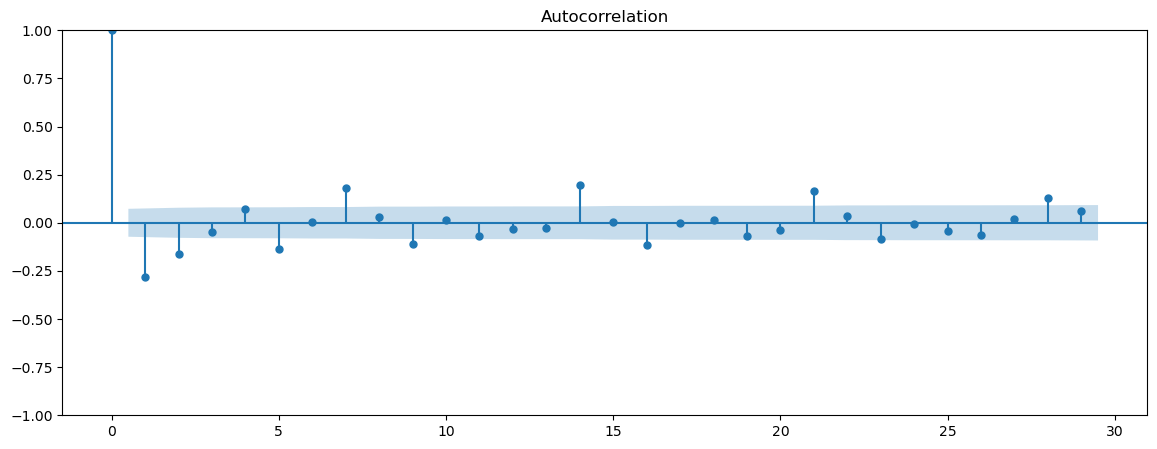

In [138]:
# plot ACF

plot_acf(df_sales_diff).set_size_inches((14,5));

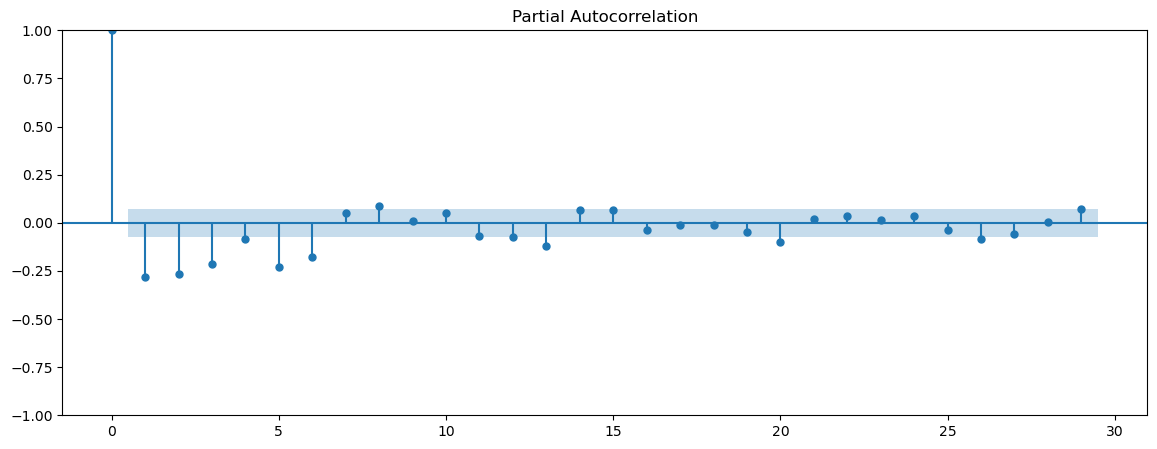

In [ ]:
# plot PACF

plot_pacf(df_sales_diff).set_size_inches((14,5));

In [ ]:
# create train-test split
y_train, y_test = temporal_train_test_split(df_sales_diff, test_size=30)

In [142]:
# specific data points

fh = ForecastingHorizon(y_test.index, is_relative=False)

In [ ]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [143]:
fh

ForecastingHorizon(['2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03'],
              dtype='datetime64[ns]', freq='D', is_relative=False)

## ARIMA Modelling

In [151]:
# define arima forecaster model

arima_forecaster = AutoARIMA(sp=30, suppress_warnings=True, random_state = 1000)

In [155]:
# fit forecaster to train data

arima_forecaster.fit(y_train)

AutoARIMA(random_state=1000, sp=30, suppress_warnings=True)

### Prediction

In [156]:
# do prediction based on forecast horizon we already defined

y_pred_arima = arima_forecaster.predict(fh=fh)

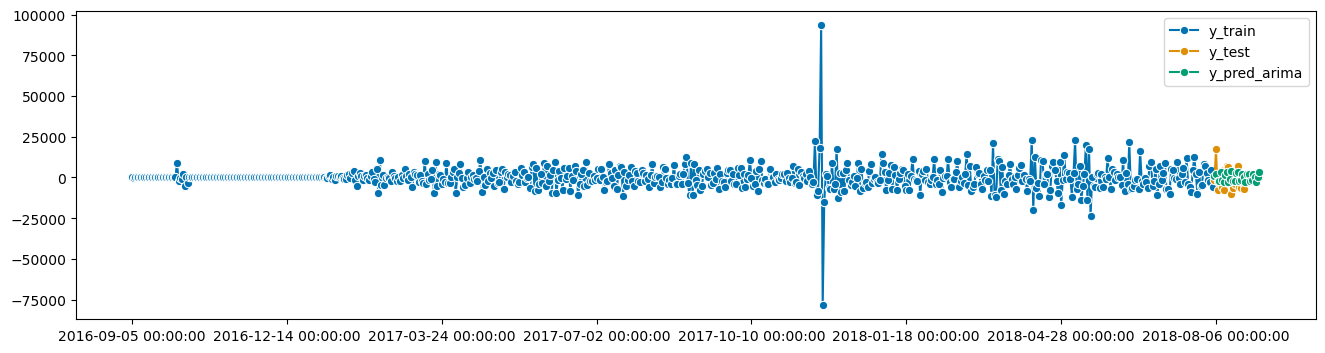

In [157]:
# plot the forecast result

plot_series(y_train, y_test, y_pred_arima, labels=["y_train", "y_test", "y_pred_arima"]);

### Check Results

In [159]:
arima_forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  699
Model:             SARIMAX(3, 0, 3)x(0, 0, [1, 2], 30)   Log Likelihood               -7079.363
Date:                                 Sun, 24 Sep 2023   AIC                          14178.726
Time:                                         13:34:39   BIC                          14224.222
Sample:                                     09-05-2016   HQIC                         14196.314
                                          - 08-04-2018                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    174.1520     86.603      2.011      0.044       4.413     343.891
ar.L1         -0.1259      0.046     -2.743      0.006      -0.216      -0.036
ar.L2         -0.8468      0.019    -44.806      0.000      -0.884      -0.810
ar.L3          0.3214      0.044      7.331      0.000       0.235       0.407
ma.L1         -0.3945      0.037    -10.727      0.000      -0.467      -0.322
ma.L2          0.5784      0.022     26.455      0.000       0.536       0.621
ma.L3         -0.8402      0.033    -25.481      0.000      -0.905      -0.776
ma.S.L30      -0.1012      0.065     -1.562      0.118      -0.228       0.026
ma.S.L60      -0.0785      0.038     -2.073      0.038      -0.153      -0.004
sigma2      3.978e+07      0.006   6.18e+09      0.000    3.98e+07    3.98e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            327421.51
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               7.47   Skew:                             6.59
Prob(H) (two-sided):                  0.00   Kurtosis:                       108.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.3e+24. Standard errors may be unstable.
"""

the JB score is really high which means the data is really skewed (far from normal distribution)

### Model Diagnostic

In [160]:
# find residuals

residuals = y_test - y_pred_arima

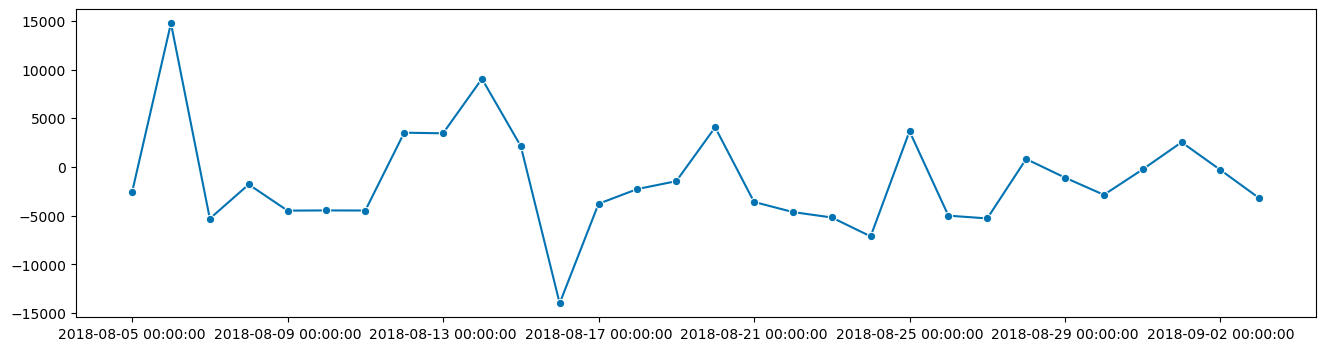

In [161]:
plot_series(residuals);

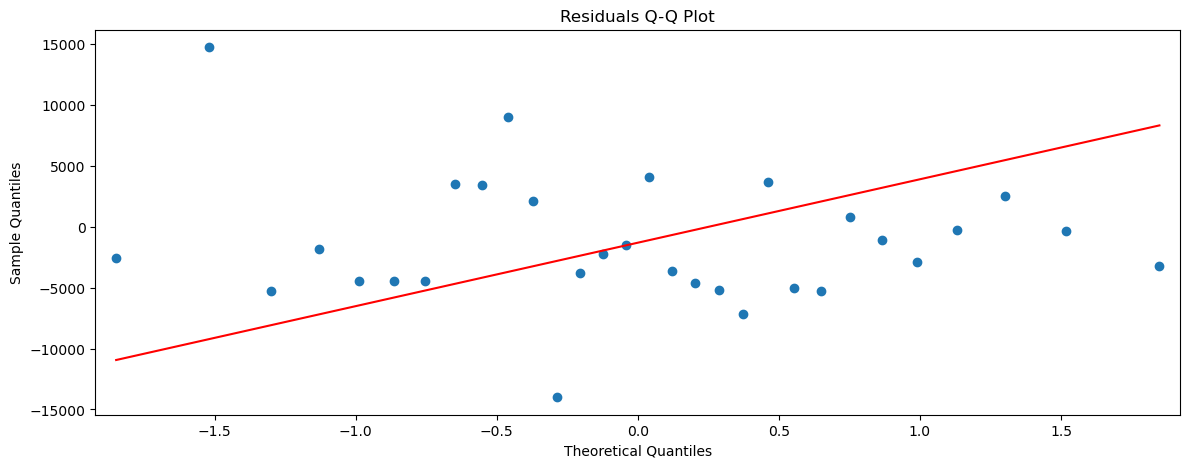

In [162]:
# Normality of Residual

sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

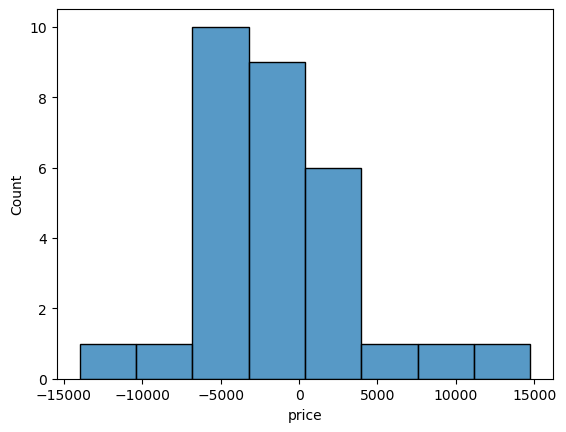

In [163]:
# Histogram

sns.histplot(data = residuals, x = "price")

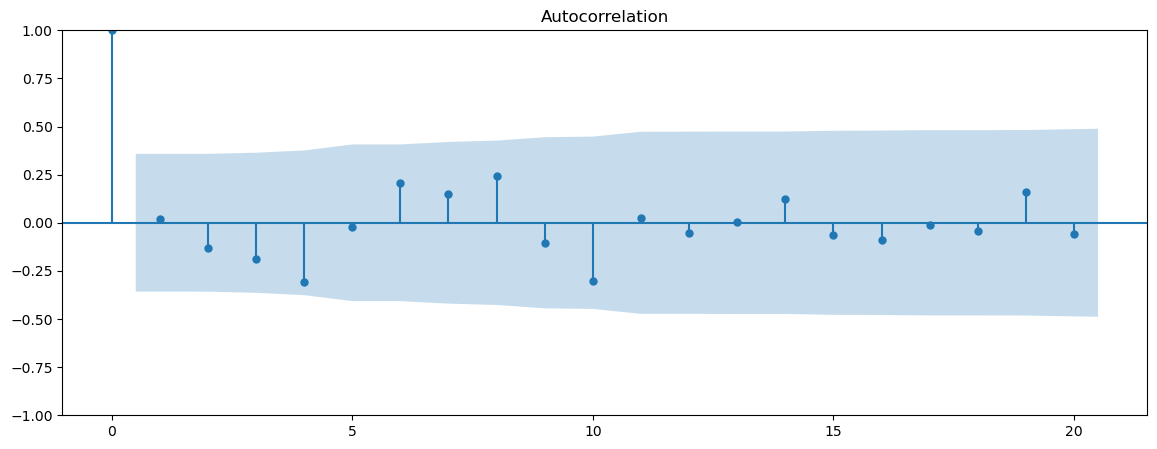

In [164]:
# Autocorrelation

# ACF plot
plot_acf(
    residuals,
    lags = 20
).set_size_inches((14,5));

In [165]:
# Model Evaluation with MAPE

mean_absolute_percentage_error(y_test, y_pred_arima) * 100

4.646473338793925e+19

## Exponential Smoothing
Exponential Smoothing can not be done because the data contains negative values.

In [166]:
# define ets forecaster model
ets_forecaster = ExponentialSmoothing(trend='mul', seasonal='multiplicative', sp=30)

In [167]:
# fit forecaster to train data
ets_forecaster.fit(y_train)

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

## AutoETS

### Modelling

In [168]:
# define auto ETS forecaster model

auto_ets_forecaster = AutoETS(auto=True, sp=30)

In [169]:
# fit forecaster to train data

auto_ets_forecaster.fit(y_train)

C:\Users\Milka\anaconda3\Lib\site-packages\sktime\forecasting\base\adapters\_statsmodels.py:54: UserWarning: Warning: time series is not strictly positive, multiplicative components are ommitted
  self._fit_forecaster(y, X)


AutoETS(auto=True, sp=30)

In [170]:
# prediction based on forecast horizon that is already defined

y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

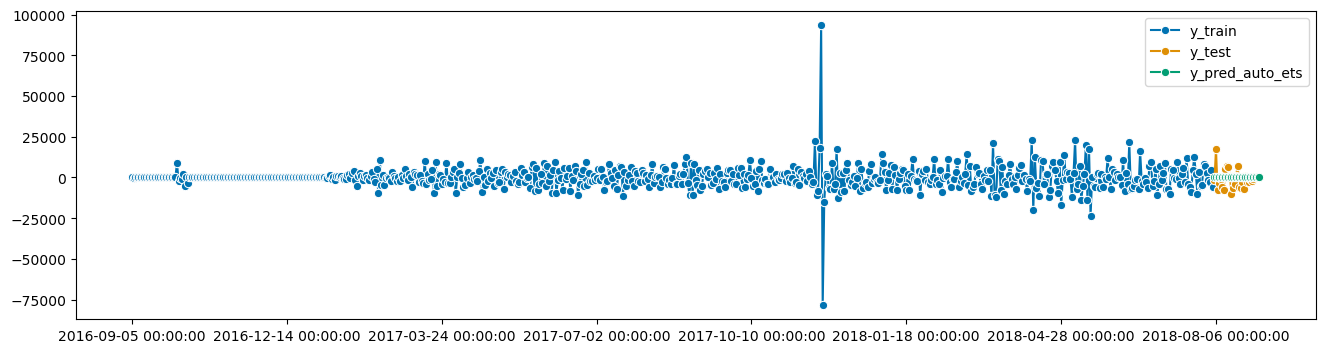

In [171]:
# plot the forecast result

plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

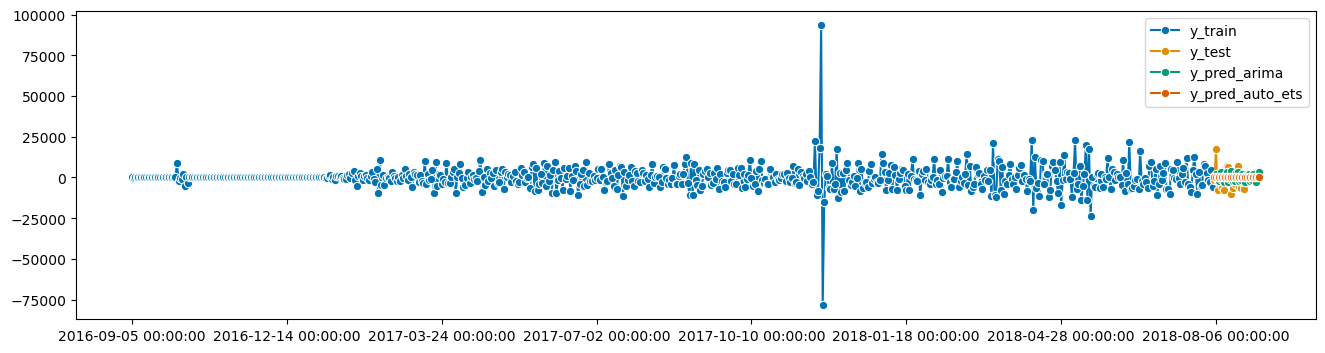

In [172]:
# plot the forecast result

plot_series(y_train, y_test, y_pred_arima, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_arima", "y_pred_auto_ets"]);

### Model Diagnostic

In [173]:
# find residuals

residuals = y_test - y_pred_auto_ets

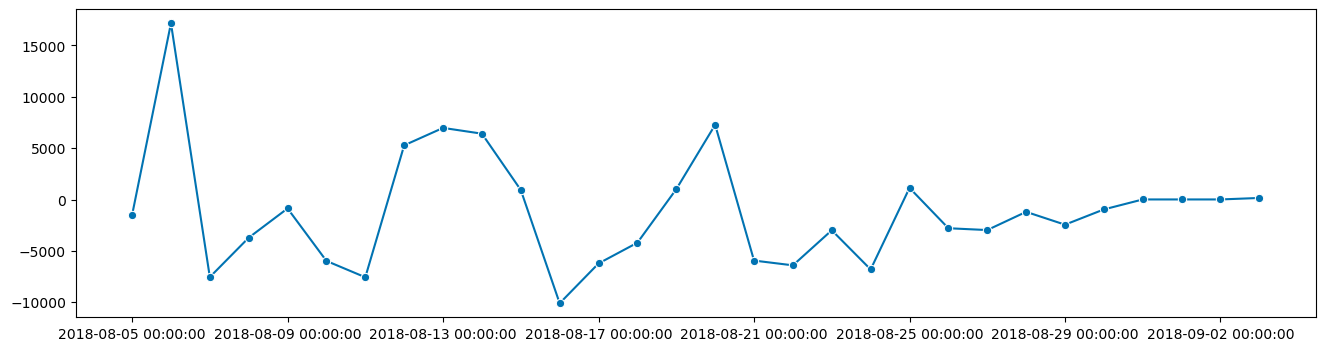

In [174]:
plot_series(residuals);

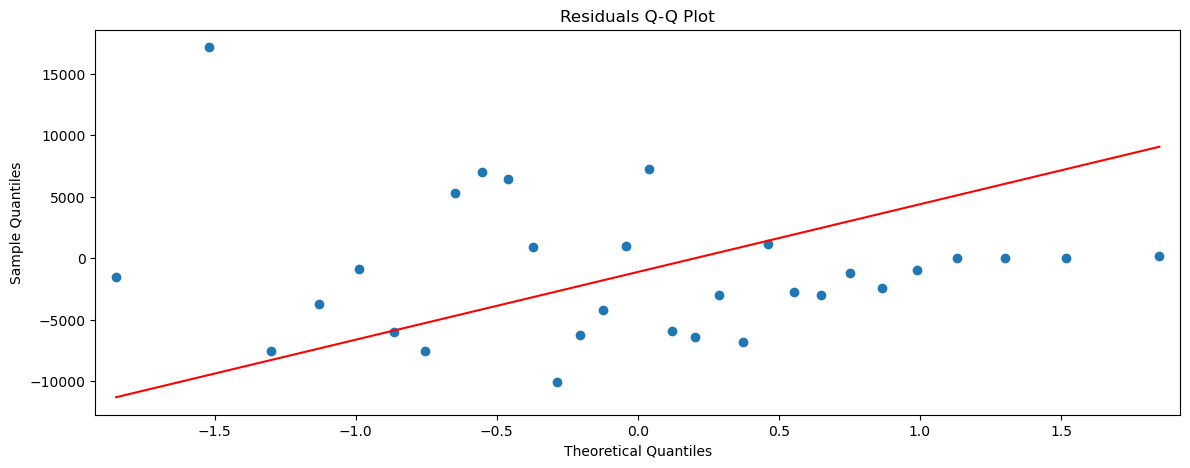

In [175]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

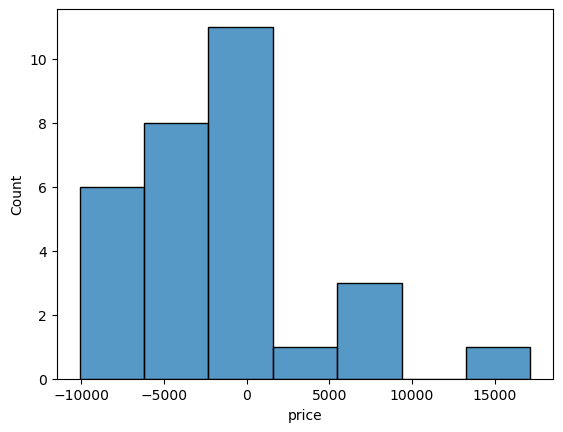

In [176]:
sns.histplot(data = residuals, x = "price")

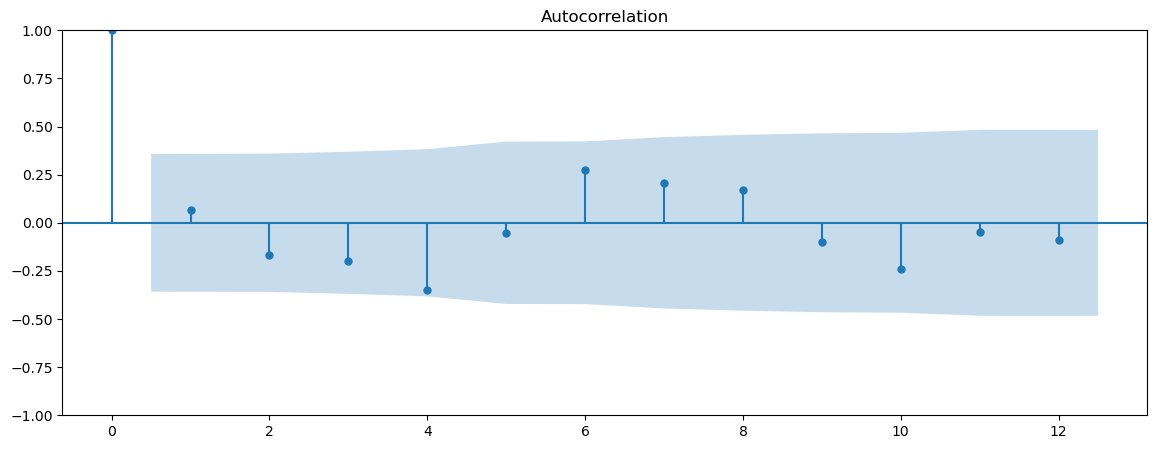

In [177]:
# ACF plot

plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

In [178]:
# Model Evaluation

mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

3.559943504787715e+17

## TBATS

In [181]:
# define TBATS model

tbats_forecaster = TBATS(sp=30)

In [182]:
# fit forecaster to data

tbats_forecaster.fit(y_train)

TBATS(sp=30)

In [183]:
# do prediction based on forecast horizon we already defined

y_pred_tbats = tbats_forecaster.predict(fh=fh)

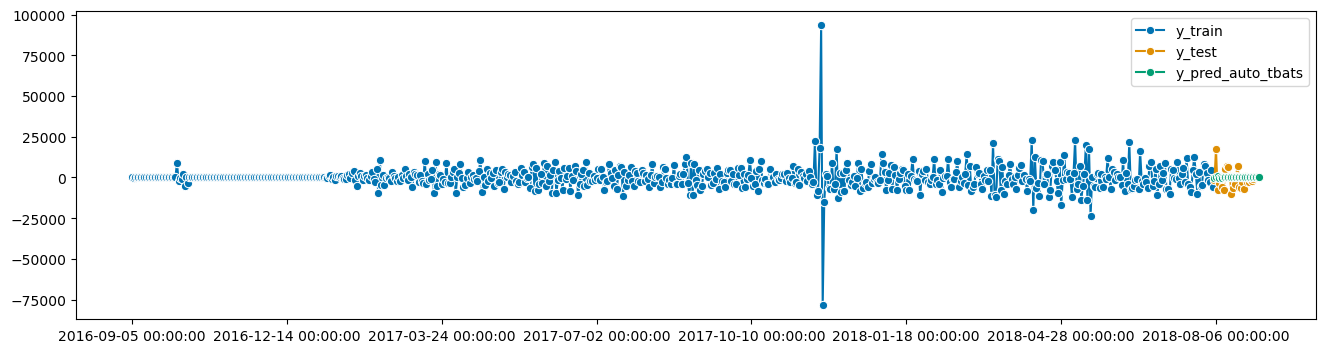

In [184]:
# plot the forecast result

plot_series(y_train, y_test, y_pred_tbats, labels=["y_train", "y_test", "y_pred_auto_tbats"]);

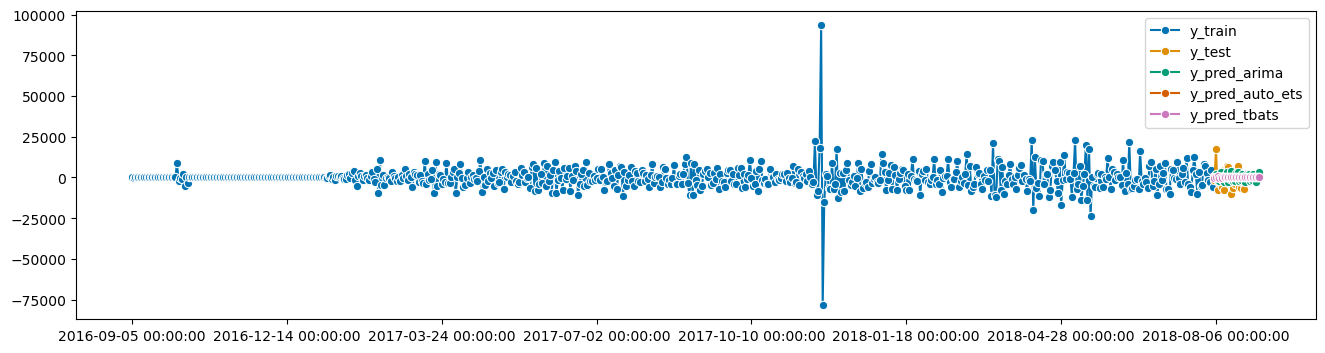

In [186]:
# plot the forecast result

plot_series(
    y_train, y_test, y_pred_arima, y_pred_auto_ets, y_pred_tbats,
    labels=["y_train", "y_test", "y_pred_arima", "y_pred_auto_ets", "y_pred_tbats"]
);

### Model Diagnostics

In [187]:
# find residuals

residuals = y_test - y_pred_tbats

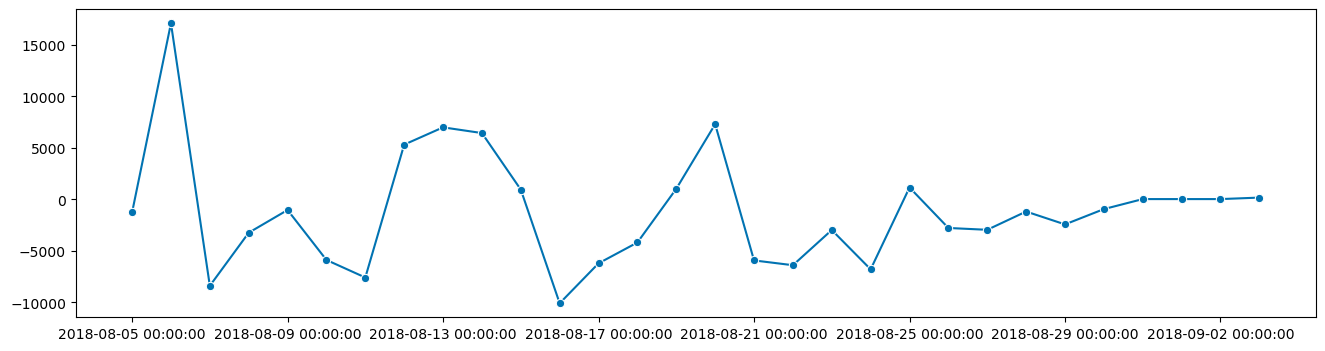

In [188]:
plot_series(residuals);

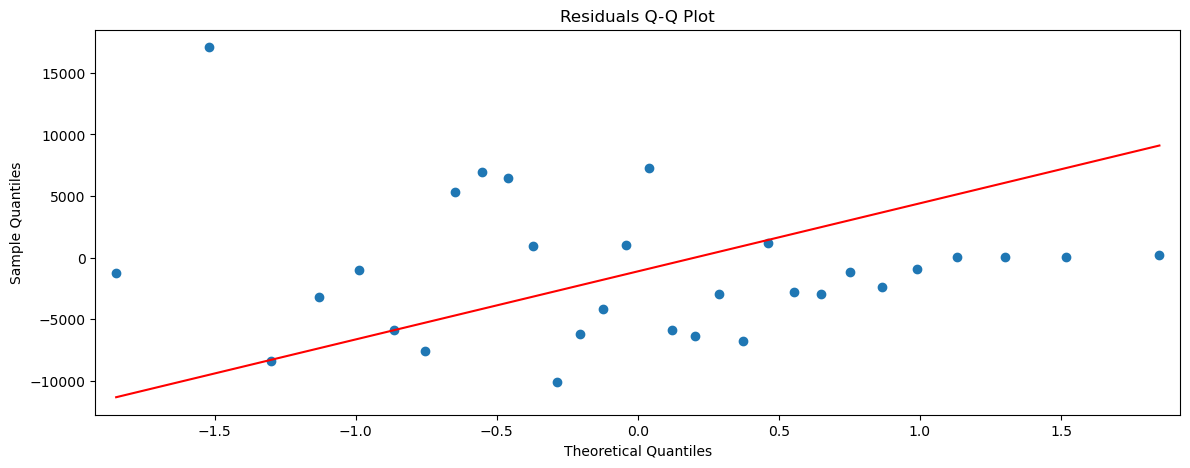

In [189]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

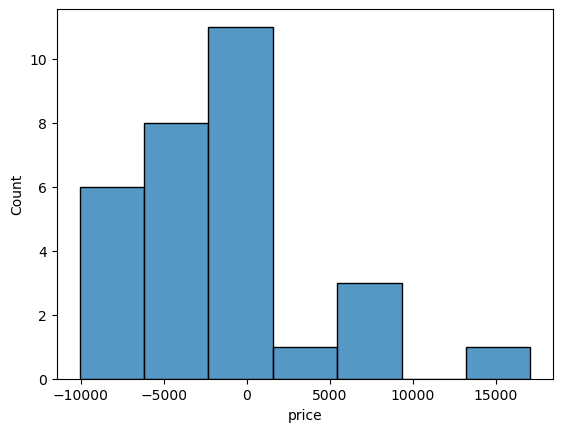

In [191]:
sns.histplot(data = residuals, x = "price")

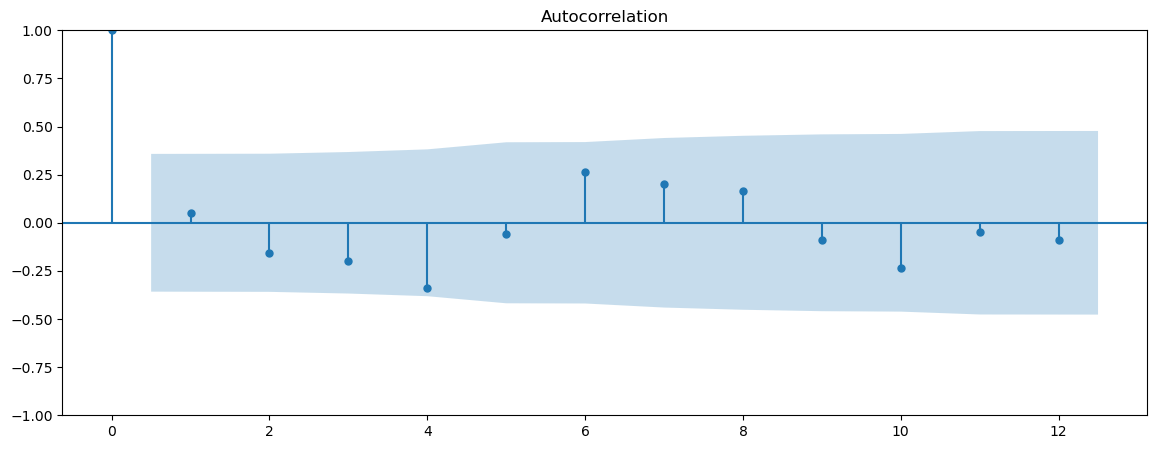

In [192]:
# ACF plot

plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

In [193]:
mean_absolute_percentage_error(y_test, y_pred_tbats) * 100

1.243540659927229e+18

## Prophet

In [195]:
# train-test split

y_train, y_test = temporal_train_test_split(df_sales_diff, test_size=36)

In [196]:
# specify data points

fh = ForecastingHorizon(y_test.index, is_relative=False)

In [200]:
# define Prophet model

prophet_forecaster = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality = False,
    weekly_seasonality = False,
    daily_seasonality = True,
    add_country_holidays = {"country_name": "Brazil"}
)

In [201]:
# fit forecaster to data

prophet_forecaster.fit(y_train)

13:59:04 - cmdstanpy - INFO - Chain [1] start processing
13:59:06 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'Brazil'}, daily_seasonality=True,
        seasonality_mode='multiplicative', weekly_seasonality=False,
        yearly_seasonality=False)

In [202]:
# prediction based on forecast horizon that is already defined

y_pred_prophet = prophet_forecaster.predict(fh=fh)

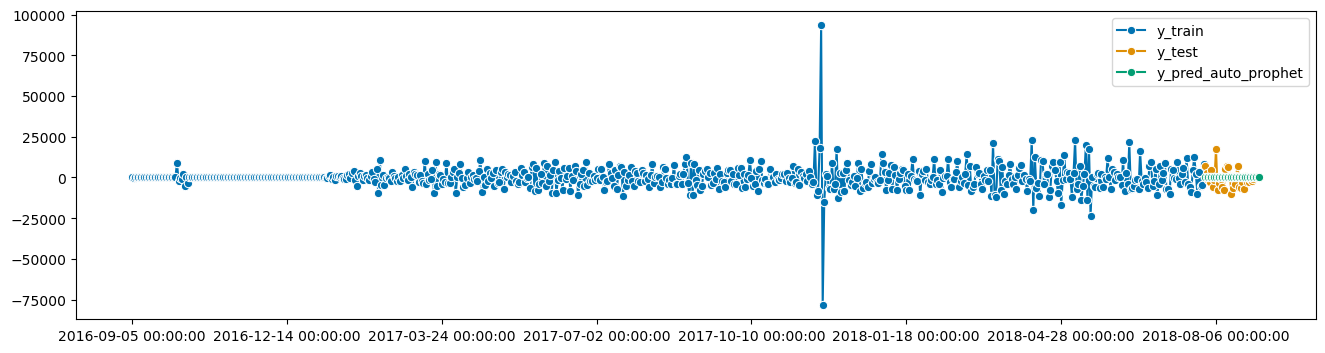

In [203]:
# plot the forecast result

plot_series(y_train, y_test, y_pred_prophet, labels=["y_train", "y_test", "y_pred_auto_prophet"]);

In [204]:
y_pred_prophet.index = pd.PeriodIndex(y_pred_prophet.index, freq = 'M')
y_train.index = pd.PeriodIndex(y_train.index, freq = 'M')
y_test.index = pd.PeriodIndex(y_test.index, freq = 'M')

In [205]:
residuals = y_test - y_pred_prophet.rename(columns={"yhat":"price"})

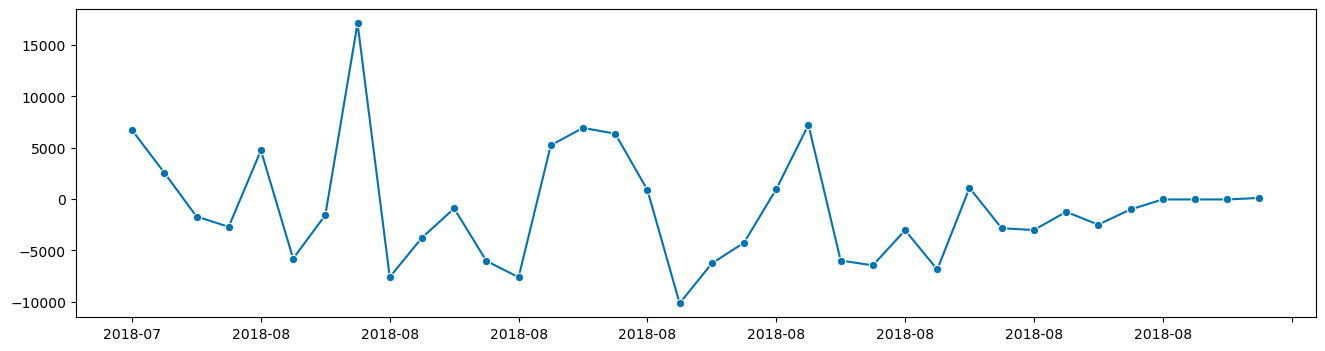

In [206]:
plot_series(residuals);

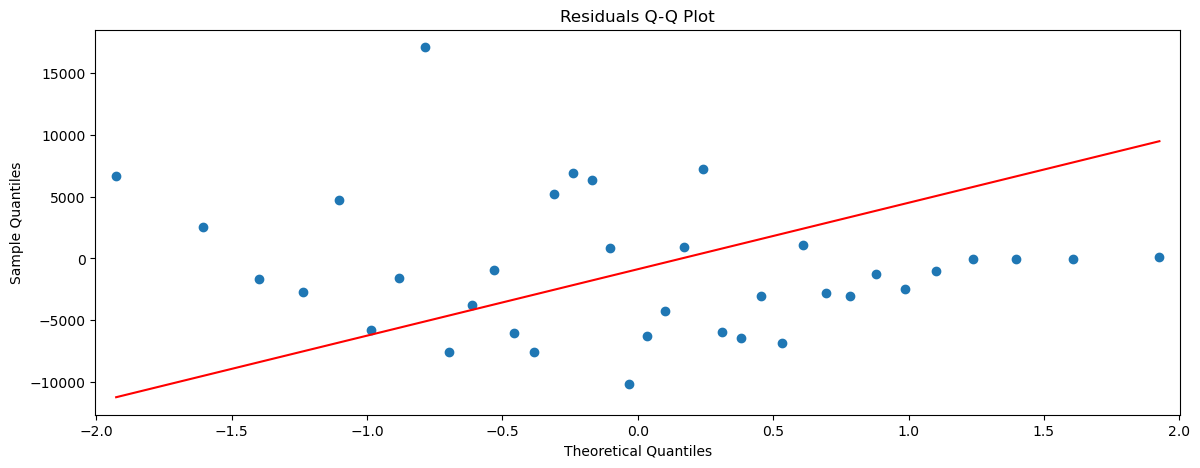

In [207]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

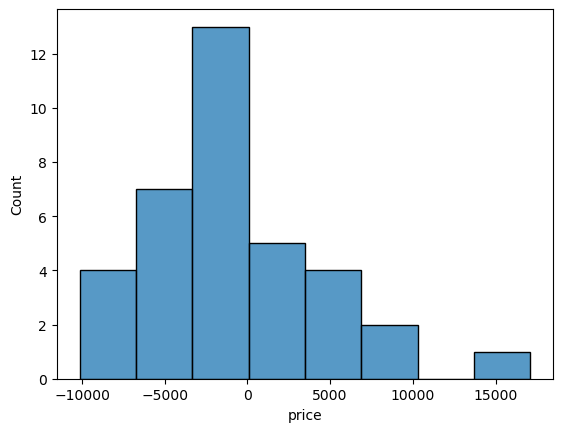

In [208]:
sns.histplot(data = residuals, x = "price")

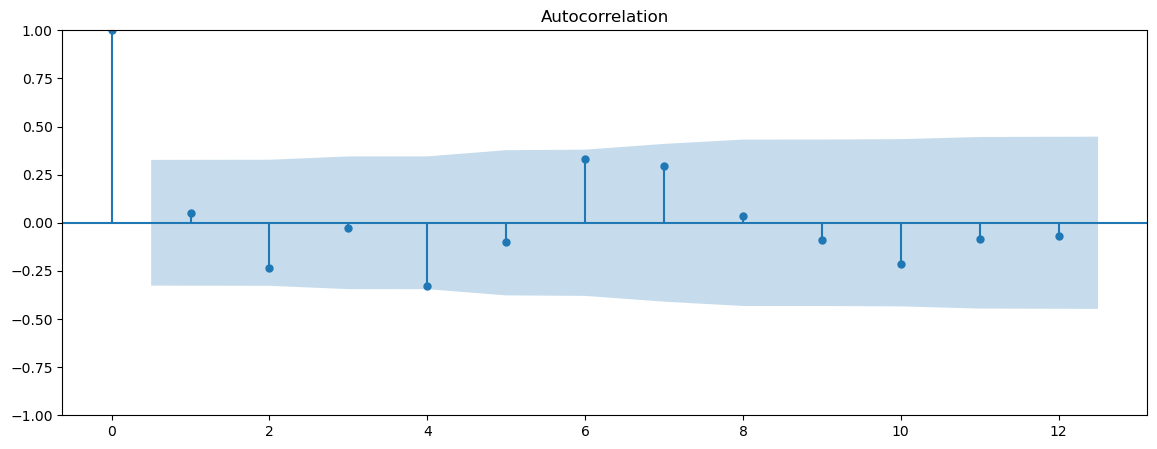

In [209]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

In [210]:
mean_absolute_percentage_error(y_test, y_pred_prophet) * 100

1.4688978608267612e+18

# Timeseries Modelling for Monthly Data

In [ ]:
import time
t_start1 = time.perf_counter()

%matplotlib inline

## Importing Libraries
import sys
import numbers
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from functools import reduce

import pmdarima as pmd
import statsmodels.api as sm 
from scipy.stats import normaltest

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
)
from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle
from darts.utils.statistics import check_seasonality, plot_acf, plot_pacf, plot_residuals_analysis
from darts.dataprocessing.transformers.boxcox import BoxCox

from darts.datasets import AirPassengersDataset, AusBeerDataset, GasRateCO2Dataset 
from darts.datasets import HeartRateDataset, IceCreamHeaterDataset, MonthlyMilkDataset
from darts.datasets import SunspotsDataset


import warnings
warnings.filterwarnings("ignore")


MSEAS = 12                    # seasonality default
ALPHA = 0.05                  # significance level default

### Diff Transformation

In [ ]:
#For Time Series,Date column must be in indexes
p = monthly_df1.set_index('date')
from datetime import datetime

p.drop(index=p.index[0], axis=0, inplace=True)
p.head()

In [ ]:
#Plotting graph between year and Total sales
sns.lineplot(x = "date" , y = "price",data= p )
plt.show()

In [ ]:
#Checking Dataset is stationary or not
results = adfuller(p['price'])
print(results)

In [ ]:
#We can also print p-value,Test statistics and Critical values as follows
results = adfuller(p['price'])
print('Test Statistics: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values: ')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key,value))

In [ ]:
#1.Difference with diff()
df_stationary = p.diff().dropna()
result = adfuller(df_stationary)
print(result)

In [ ]:
indexeddataset_logscale = np.log(p['price'])
result = adfuller(indexeddataset_logscale)
print(result)

In [ ]:
datasetLogDiffShifting = indexeddataset_logscale - indexeddataset_logscale.shift()
datasetLogDiffShifting.dropna(inplace=True)
result = adfuller(datasetLogDiffShifting)
print(result)

In [ ]:
movingaverage = indexeddataset_logscale.rolling(window=12).mean()
movingstd = indexeddataset_logscale.rolling(window=12).std()
datasetlogscaleminusmovingaverage = indexeddataset_logscale - movingaverage
datasetlogscaleminusmovingaverage.dropna(inplace=True)
result = adfuller(datasetlogscaleminusmovingaverage)
print(result)

In [ ]:
plot = plt.plot(datasetlogscaleminusmovingaverage,color='blue',label='Original')
mean = plt.plot(movingaverage, color='red',label='Rolling Mean')
std = plt.plot(movingstd, color='Black',label='Rolling STD')
plt.legend(loc='best')
#plt.title()
plt.show(block=True)

In [ ]:
datasetlogscaleminusmovingaverage.head()

In [ ]:
#Converting above from Series to dataframe
datasetlogscaleminusmovingaverage = pd.Series(datasetlogscaleminusmovingaverage)
new_dataset = datasetlogscaleminusmovingaverage.to_frame()
new_dataset

### ARIMA

In [ ]:
import time
t_start1 = time.perf_counter()

%matplotlib inline

## Importing Libraries
import sys
import numbers
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from functools import reduce

import pmdarima as pmd
import statsmodels.api as sm 
from scipy.stats import normaltest

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
)
from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle
from darts.utils.statistics import check_seasonality, plot_acf, plot_pacf, plot_residuals_analysis
from darts.dataprocessing.transformers.boxcox import BoxCox

from darts.datasets import AirPassengersDataset, AusBeerDataset, GasRateCO2Dataset 
from darts.datasets import HeartRateDataset, IceCreamHeaterDataset, MonthlyMilkDataset
from darts.datasets import SunspotsDataset


import warnings
warnings.filterwarnings("ignore")


MSEAS = 12                    # seasonality default
ALPHA = 0.05                  # significance level default

In [ ]:
ts = TimeSeries.from_dataframe(new_dataset, time_col = 'date', value_cols = 'price')
series = ts #buat backup

In [ ]:
ts_train, ts_test = new_dataset.split_before(0.75)
ts_train.plot(label = 'train')
ts_test.plot(label = 'test')

In [ ]:
#Autocorrelation
ecom_df = new_dataset
acf(ecom_df, fft=False)
sm.graphics.tsa.plot_acf(ecom_df.values.squeeze(), lags=12);

In [ ]:
sm.graphics.tsa.plot_pacf(ecom_df.values.squeeze(), lags=5,
                          method='yw_adjusted');

sm.graphics.tsa.plot_pacf(ecom_df.values.squeeze(), lags=5,
                         method='ols');

In [ ]:
# Change frequency to day
ecom_df = new_dataset.asfreq('d')

# Set style for seaborn plot
sns.set_style('darkgrid')

# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()

# Default figure size
sns.mpl.rc('figure',figsize=(12, 6))

# Plot daily max temps
fig, ax = plt.subplots()
ax = ecom_df.plot(ax=ax)

# Creating model 
model = AutoReg(ecom_df['price'],30)
model_fit = model.fit()

# Define training and testing area
len(ecom_df) # 778 observations
train_df = ecom_df.iloc[:620] 
test_df = ecom_df.iloc[620:] 

# Define training model for 159 days 
train_model = AutoReg(ecom_df['price'], 159).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)
# Plot testing data with prediction
ax = test_df.plot(ax=ax) # Orange
ax = prediction.plot(ax=ax) # Green

In [ ]:
from datetime import timedelta

In [ ]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')
    
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    sns.lineplot(x=(second.date + timedelta(6*365/12)), y=y_col, data=second, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Date",
           ylabel = "Price",
           title = title)
    
    sns.despine()

In [ ]:
time_plot(monthly_df1, 'date', 'price', 'Monthly Sales Before Diff Transformation')

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(monthly_df1['price'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

Since the p-value is large, we cannot reject the null hypothesis and must assume that the time series is non-stationary.

### Log Transformation

In [ ]:
log_df = monthly_df1.copy()

In [ ]:
log_df['price'] = np.log(log_df['price'])
log_df['diff_price'] = log_df['price'].diff()

In [ ]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(log_df['price']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(log_df['price'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(log_df['price'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(log_df['price'], ax=ax1)
plot_acf(log_df['price'].diff().dropna(), ax=ax2)
plot_acf(log_df['price'].diff().diff().dropna(), ax=ax3)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(log_df['price'].diff().dropna(), lags=10)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(log_df['price'].diff().dropna(), lags=10)

In [ ]:
ad_fuller_result = adfuller(log_df['price'].diff().dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_df['price'], order = (0,2,2))
model_fit = model.fit()
model_fit.summary()

In [ ]:
from math import sqrt

X = log_df['price'].diff().dropna().values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)
r2 = r2_score(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
print('Test R2: %.3f' % r2)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
log_df['arima_model'] = best_model.fittedvalues
log_df['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=log_df.shape[0], end=log_df.shape[0] + 12)
forecast = log_df['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(log_df.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(log_df['diff_price'], label='actual')
plt.legend()
plt.show()

In [ ]:
ad_fuller_result = adfuller(log_df['diff_price'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

The p-value is small enough for us to reject the null hypothesis, and we can consider that the time series is stationary.

### SARIMA Modelling

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
best_model = SARIMAX(log_df['diff_price'], order=(0, 0, 4), seasonal_order=(0, 0, 1, 10)).fit(dis=-1)
print(best_model.summary())

* The p-value is 0.8, which is significantly higher than 0.05 (95% confidence threshold). So we accept the Null hypothesis of the Ljung-Box test that the residual errors are not auto-correlated.
* This is probably because the errors are some kurtotics (note that the Kurtosis=3.64 as a little bit more than the normal values of 3.0 to be considered as a normal distribution). 
* Note also that the errors are not at all skewed (skewness=-0.08 as against 0.0 for normally distributed errors).

In [ ]:
best_model.plot_diagnostics(figsize=(15,12))

In [ ]:
log_df['arima_model'] = best_model.fittedvalues
log_df['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=log_df.shape[0], end=log_df.shape[0] + 12)
forecast = log_df['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(log_df.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(log_df['diff_price'], label='actual')
plt.legend()
plt.show()

In [ ]:
def get_scores(data):
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.diff_price[-12:], data.arima_model[-12:]))
    mae = mean_absolute_error(data.diff_price[-12:], data.arima_model[-12:])
    r2 = r2_score(data.diff_price[-12:], data.arima_model[-12:])
    mape = mean_absolute_percentage_error(data.diff_price[-12:], data.arima_model[-12:])
    model_scores['ARIMA'] = [rmse, mae, r2, mape]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE Score: {mape}")
    print(f"R2 Score: {r2}")
    

In [ ]:
get_scores(log_df)

## Order Timeseries Modelling

### Diff Transformation

In [ ]:
time_plot(monthly_df, 'date', 'total_order', 'Monthly Order Before Diff Transformation')

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(monthly_df['total_order'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

Since the p-value is large, we cannot reject the null hypothesis and must assume that the time series is non-stationary.

### Log Transformation

In [ ]:
order_log_df = monthly_df.copy()

In [ ]:
order_log_df['total_order'] = np.log(order_log_df['total_order'])
order_log_df['diff_order'] = order_log_df['total_order'].diff()

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(order_log_df['diff_order'])
plt.title("Log Difference of Monthly Order")
plt.show()

In [ ]:
order_log_df.dropna(inplace=True)

In [ ]:
ad_fuller_result = adfuller(order_log_df['diff_order'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

The p-value is small enough for us to reject the null hypothesis, and we can consider that the time series is stationary.

### SARIMA Modelling

In [ ]:
best_model2 = SARIMAX(order_log_df['diff_order'], order=(12, 0, 3), seasonal_order=(0, 0, 3, 4)).fit(dis=-1)
print(best_model2.summary())

* The p-value is 0.96, which is significantly higher than 0.05 (95% confidence threshold). So we accept the Null hypothesis of the Ljung-Box test that the residual errors are not auto-correlated.
* This is probably because the errors are highly kurtotic (note that the Kurtosis=7.97 as a little bit more than the normal values of 3.0 to be considered as a normal distribution). 
* Note also that the errors are not at all skewed (skewness=-1.56 as against 0.0 for normally distributed errors).

In [ ]:
best_model2.plot_diagnostics(figsize=(15,12))

In [ ]:
order_log_df['arima_model'] = best_model2.fittedvalues
order_log_df['arima_model'][:4+1] = np.NaN
forecast2 = best_model2.predict(start=order_log_df.shape[0], end=order_log_df.shape[0] + 12)
forecast2 = order_log_df['arima_model'].append(forecast2)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast2, color='r', label='model')
plt.axvspan(order_log_df.index[-1], forecast2.index[-1], alpha=0.5, color='lightgrey')
plt.plot(order_log_df['diff_order'], label='actual')
plt.legend()
plt.show()

In [ ]:
def get_scores(data):
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.diff_order[-12:], data.arima_model[-12:]))
    mae = mean_absolute_error(data.diff_order[-12:], data.arima_model[-12:])
    r2 = r2_score(data.diff_order[-12:], data.arima_model[-12:])
    mape = mean_absolute_percentage_error(data.diff_order[-12:], data.arima_model[-12:])
    model_scores['ARIMA'] = [rmse, mae, r2, mape]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE Score: {mape}")
    print(f"R2 Score: {r2}")
    

In [ ]:
get_scores(order_log_df)

## Bed_Bath Order Time-series Prediction

### Diff Transformation

In [ ]:
bbb_order_df = monthly_order(df_bbb)

In [ ]:
time_plot(bbb_order_df, 'date', 'total_order', 'Monthly Order Before Diff Transformation')

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(bbb_order_df['total_order'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

The p-value is small enough for us to reject the null hypothesis, and we can consider that the time series is stationary.

### SARIMA Modelling

In [ ]:
best_model1 = SARIMAX(bbb_log_df['total_order'], order=(0, 0, 3), seasonal_order=(0,0,3,4)).fit(dis=-1)
print(best_model1.summary())

* The p-value is 0.95, which is significantly higher than 0.05 (95% confidence threshold). So we accept the Null hypothesis of the Ljung-Box test that the residual errors are not auto-correlated.
* Note also that the errors are not at all skewed (skewness=-0.06 as against 0.0 for normally distributed errors).

In [ ]:
best_model1.plot_diagnostics(figsize=(15,12))

In [ ]:
bbb_log_df['arima_model'] = best_model1.fittedvalues
bbb_log_df['arima_model'][:4+1] = np.NaN
forecast1 = best_model1.predict(start=bbb_log_df.shape[0], end=bbb_log_df.shape[0] + 12)
forecast1 = bbb_log_df['arima_model'].append(forecast1)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast1, color='r', label='model')
plt.axvspan(bbb_log_df.index[-1], forecast1.index[-1], alpha=0.5, color='lightgrey')
plt.plot(bbb_log_df['total_order'], label='actual')
plt.legend()
plt.show()

In [ ]:
def get_scores1(data):
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.total_order[-12:], data.arima_model[-12:]))
    mae = mean_absolute_error(data.total_order[-12:], data.arima_model[-12:])
    r2 = r2_score(data.total_order[-12:], data.arima_model[-12:])
    mape = mean_absolute_percentage_error(data.total_order[-12:], data.arima_model[-12:])
    model_scores['ARIMA'] = [rmse, mae, r2, mape]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE Score: {mape}")
    print(f"R2 Score: {r2}")
    

In [ ]:
get_scores1(bbb_log_df)